<a href="https://colab.research.google.com/github/paulorc-silva/Conteudos-Sobre-Dados--Impacta/blob/master/Aulas_An%C3%A1lise_Explorat%C3%B3ria_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Introdução à análise exploratória de dados



###### Nessa aula não foi apresentado nenhum conceito que pudesse ser aplicado ao Google Colab. Foi dado apenas a teoria.

# Aula 02 - Estatística e probabilidade

## 1. Amostragem para Estimar Média

Suponha que deseja-se determinar o **Salário Médio** dos habitantes de uma determinada cidade.

In [ ]:
import random #biblioteca
from random import randint

In [ ]:
random.randint(1000,15000)

7961

In [ ]:
Salarios = []

for i in range(0,15000):
  Salarios.append(random.randint(1000,15000))

print(len(Salarios))

15000


In [ ]:
Salarios[0:5]

[13468, 2172, 11198, 11626, 14341]

### Confiança e obtenção do valor de Z

In [ ]:
from scipy import stats #Importando a biblioteca

def obter_Z(erro_alfa=0.05, dar_print=True):
  global z_crit
  # Erro é denominado alfa
  alfa = erro_alfa # Estamos falando que o erro é de 5% , ou seja, confiança de 95%
  n_caudas = 2 # Nesse momento, não vamos abordar o que significam as caudas
  z_crit = stats.norm.ppf(1-alfa/n_caudas)
  if dar_print:
    print(f'Valor de Z: {z_crit:.2f} e armazenado na variavel global z_crit com um erro igual a {alfa}') # O valor de Z é de aproximadamente 1.96 1.959963984540054

In [ ]:
obter_Z(erro_alfa=0.05)

Valor de Z: 1.96 e armazenado na variavel global z_crit com um erro igual a 0.05


In [ ]:
print(f'{z_crit:.2f}')

1.96


### Tamanhos da Amostra


#### População Finita e estimação da média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
var_amostral = 250000
N_Pop = len(Salarios) # A quantidade de salarios é igual a quantidade total de registros
Margem_Erro = 100


def n_PopFinita_EstimarMedia(z_crit=z_crit,var_amostral=var_amostral,N_Pop=N_Pop,Margem_Erro=Margem_Erro,dar_print=True):
  global n_amostra
  # Formula
  n_amostra = ((z_crit**2)*(var_amostral)*(N_Pop))/((Margem_Erro**2)*(N_Pop-1)+((z_crit**2)*(var_amostral)))
  #Arredondamento
  if n_amostra-int(n_amostra) > 0: #Se houver casas decimais, entao somamos um para a quantidade de amostras dado que é um numero inteiro
    n_amostra = int(n_amostra)+1

  if dar_print:
    print(f'Tamanho da amostra para estimar média com uma populacao finita igual a {n_amostra}, salvo na variavel n_amostra')

n_PopFinita_EstimarMedia(z_crit=z_crit,var_amostral=var_amostral,N_Pop=N_Pop,Margem_Erro=Margem_Erro)

Tamanho da amostra para estimar média com uma populacao finita igual a 96, salvo na variavel n_amostra


#### População Infinita e estimação da média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
var_amostral = 250000
Margem_Erro = 100

def n_PopInfinita_EstimarMedia(z_crit=z_crit,var_amostral=var_amostral,Margem_Erro=Margem_Erro,dar_print=True):
  global n_amostra
  # Formula
  n_amostra = ((z_crit**2)*(var_amostral))/((Margem_Erro**2))
  #Arredondamento
  if n_amostra-int(n_amostra) > 0: #Se houver casas decimais, entao somamos um para a quantidade de amostras dado que é um numero inteiro
    n_amostra = int(n_amostra)+1

  if dar_print:
    print(f'Tamanho da amostra para estimar média com uma populacao infinita igual a {n_amostra}, salvo na variavel n_amostra')

n_PopInfinita_EstimarMedia(z_crit=z_crit,var_amostral=var_amostral,Margem_Erro=Margem_Erro,dar_print=True)

Tamanho da amostra para estimar média com uma populacao infinita igual a 97, salvo na variavel n_amostra


### Margem de Erro

#### População Finita e estimação da média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
desvio_amostral = 500
n_amostra = 96
N_Pop = len(Salarios)

def obter_Margem_de_Erro_PopFinita_EstimarMedia(z_crit=z_crit,desvio_amostral=desvio_amostral,n_amostra=n_amostra,N_Pop=N_Pop,dar_print=True):
  global Margem_Erro
  Margem_Erro = z_crit * (desvio_amostral/(n_amostra**0.5)) * (((N_Pop-n_amostra)/(N_Pop-1))**0.5)

  if dar_print:
    print(f'A margem de erro para estimar a média sabendo o tamanho da população é igual a {Margem_Erro}')

obter_Margem_de_Erro_PopFinita_EstimarMedia(z_crit=z_crit,desvio_amostral=desvio_amostral,n_amostra=n_amostra,N_Pop=N_Pop,dar_print=True)

A margem de erro para estimar a média sabendo o tamanho da população é igual a 99.70174218323541


#### População Infinita e estimação de Média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
desvio_amostral = 500
n_amostra = 96

def obter_Margem_de_Erro_PopInfinita_EstimarMedia(z_crit=z_crit,desvio_amostral=desvio_amostral,n_amostra=n_amostra,dar_print=True):
  global Margem_Erro
  Margem_Erro = z_crit * (desvio_amostral/(n_amostra**0.5))

  if dar_print:
    print(f'A margem de erro para estimar a média sabendo o tamanho da população é igual a {Margem_Erro}')

obter_Margem_de_Erro_PopInfinita_EstimarMedia(z_crit=z_crit,desvio_amostral=desvio_amostral,n_amostra=n_amostra,dar_print=True)

A margem de erro para estimar a média sabendo o tamanho da população é igual a 100.0189932574023


In [ ]:
N = ['N']
Finita = ['n']
Infinita = ['n']
for i in [10,100,1000,10000,50000,500000,1000000,10000000,100000000,1000000000]:
  N.append(i)
  # Obter o tamanho da amostra com a Populacao Finita
  n_PopFinita_EstimarMedia(z_crit=1.96,var_amostral=25000000,N_Pop=i,Margem_Erro=1000,dar_print=False)
  Finita.append(n_amostra)

  #Obter o tamanho da amostra com a População Infinita
  n_PopInfinita_EstimarMedia(z_crit=1.96,var_amostral=25000000,Margem_Erro=1000,dar_print=False)
  Infinita.append(n_amostra)

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(N, Finita,Infinita)), # zip cria uma lista de tupla. Cada tupla equivale a uma linha da tabela
               columns =['N', 'Finita','Infinita']) #determinando o nome das colunas na ordem

df

,N,Finita,Infinita
0,N,n,n
1,10,10,97
2,100,50,97
3,1000,88,97
4,10000,96,97
5,50000,96,97
6,500000,97,97
7,1000000,97,97
8,10000000,97,97
9,100000000,97,97


In [ ]:
x = zip(N, Finita,Infinita)
print(list(x))

[('N', 'n', 'n'), (10, 10, 97), (100, 50, 97), (1000, 88, 97), (10000, 96, 97), (50000, 96, 97), (500000, 97, 97), (1000000, 97, 97), (10000000, 97, 97), (100000000, 97, 97), (1000000000, 97, 97)]


### Atividades

EXERCICIO 1

A partir dos erros abaixom quais os valores de Z?
1. 1%
2. 5%
3. 10%

In [ ]:
# 1%
obter_Z(erro_alfa=0.01, dar_print=True)

Valor de Z: 2.58 e armazenado na variavel global z_crit com um erro igual a 0.01


In [ ]:
# 5%
obter_Z(erro_alfa=0.05, dar_print=True)

Valor de Z: 1.96 e armazenado na variavel global z_crit com um erro igual a 0.05


In [ ]:
# 10%
obter_Z(erro_alfa=0.1, dar_print=True)

Valor de Z: 1.64 e armazenado na variavel global z_crit com um erro igual a 0.1


EXERCICIO 2

Você foi contratado por uma startup da área de saúde. Eles precisam que você analise o comportamento dos pacientes para estimar a média populacional do Q.I. dos pacientes.

Para aumentar a confiança no projeto, os médicos determinaram que precisam de um erro muito baixo (1%).

A partir de uma amostra de piloto, obteve a variância estimada igual a 50. Espera-se que a margem de erro seja igual a 5.

In [ ]:
# Responder Exercicio 2
n_PopInfinita_EstimarMedia(z_crit=2.58,var_amostral=225,Margem_Erro=5,dar_print=True)

Tamanho da amostra para estimar média com uma populacao infinita igual a 60, salvo na variavel n_amostra


EXERCICIO 3

Sua empresa está lançando um novo celular. A equipe de marketing disse que uma informação que aumenta as vendas é saber o **tempo médio da duração da bateria**.

Para isso, a equipe de produto ligou um total de 20 celulares e anotou algumas informações a pedido das equipes de marketing e ciência de dados.

Informações:
1. 25 celularem foram utilizados no teste
2. A bateria durou, em média, 72 horas
3. A variância amostral foi de 49 horas
4. As equipes determinaram que a margem de erro seria de 2 horas
5. A equipe quer ter 90% de confiança.

**Pergunta**: podemos dizer que a duração média da bateria igual a 72 horas vai representar a produção total de aparelhos celulares? Justifique.

In [ ]:
# Resposta: Nao. A amostra precisaria ser de no minimo 33 casos para podermos confiar nessa media a partir do erro, variancia e margem consideradas.
n_PopInfinita_EstimarMedia(z_crit=1.64,var_amostral=49,Margem_Erro=2,dar_print=True)

Tamanho da amostra para estimar média com uma populacao infinita igual a 33, salvo na variavel n_amostra


##2. Amostragem para Estimar Proporção

Suponha que deseja-se determinar a **proporção**  de eleitores que votarão no candidato A

In [ ]:
import random #biblioteca
from random import randint

In [ ]:
random.randint(0,1)

0

In [ ]:
Votos = []

for i in range(0,8000):
  Votos.append(random.randint(0,1))

print(len(Votos))

8000


In [ ]:
Votos[0:5]

[1, 1, 1, 0, 1]

### Confiança e obtenção do valor de Z

In [ ]:
from scipy import stats #Importando a biblioteca

def obter_Z(erro_alfa=0.05, dar_print=True):
  global z_crit
  # Erro é denominado alfa
  alfa = erro_alfa # Estamos falando que o erro é de 5% , ou seja, confiança de 95%
  n_caudas = 2 # Nesse momento, não vamos abordar o que significam as caudas
  z_crit = stats.norm.ppf(1-alfa/n_caudas)
  if dar_print:
    print(f'Valor de Z: {z_crit:.2f} e armazenado na variavel global z_crit com um erro igual a {alfa}') # O valor de Z é de aproximadamente 1.96 1.959963984540054

In [ ]:
obter_Z(erro_alfa=0.025)

Valor de Z: 2.24 e armazenado na variavel global z_crit com um erro igual a 0.025


In [ ]:
print(f'{z_crit:.2f}')

2.24


### Tamanhos da Amostra


#### População Finita e estimação da proporção

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
N_Pop = len(Votos) # A quantidade de salarios é igual a quantidade total de registros
Margem_Erro = 0.03


def n_PopFinita_EstimarProp(z_crit=z_crit,N_Pop=N_Pop,Margem_Erro=Margem_Erro,dar_print=True):
  global n_amostra
  # Formula
  n_amostra = ((z_crit**2)*(0.25)*(N_Pop))/((Margem_Erro**2)*(N_Pop-1)+((z_crit**2)*(0.25)))
  #Arredondamento
  if n_amostra-int(n_amostra) > 0: #Se houver casas decimais, entao somamos um para a quantidade de amostras dado que é um numero inteiro
    n_amostra = int(n_amostra)+1

  if dar_print:
    print(f'Tamanho da amostra para estimar proporcao com uma populacao finita igual a {n_amostra}, salvo na variavel n_amostra')

n_PopFinita_EstimarProp(z_crit=z_crit,N_Pop=N_Pop,Margem_Erro=Margem_Erro)

Tamanho da amostra para estimar proporcao com uma populacao finita igual a 942, salvo na variavel n_amostra


#### População Infinita e estimação da média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
Margem_Erro = 0.03

def n_PopInfinita_EstimarProp(z_crit=z_crit,Margem_Erro=Margem_Erro,dar_print=True):
  global n_amostra
  # Formula
  n_amostra = ((z_crit**2)*(0.25))/((Margem_Erro**2))
  #Arredondamento
  if n_amostra-int(n_amostra) > 0: #Se houver casas decimais, entao somamos um para a quantidade de amostras dado que é um numero inteiro
    n_amostra = int(n_amostra)+1

  if dar_print:
    print(f'Tamanho da amostra para estimar proporcao com uma populacao infinita igual a {n_amostra}, salvo na variavel n_amostra')

n_PopInfinita_EstimarProp(z_crit=z_crit,Margem_Erro=Margem_Erro,dar_print=True)

Tamanho da amostra para estimar proporcao com uma populacao infinita igual a 1068, salvo na variavel n_amostra


### Margem de Erro

#### População Finita e estimação da média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
n_amostra = 942
N_Pop = len(Votos)

def obter_Margem_de_Erro_PopFinita_EstimarProp(z_crit=z_crit,n_amostra=n_amostra,N_Pop=N_Pop,dar_print=True):
  global Margem_Erro
  Margem_Erro = z_crit * (0.25/(n_amostra))**0.5 * (((N_Pop-n_amostra)/(N_Pop-1)))**0.5

  if dar_print:
    print(f'A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a {Margem_Erro}')

obter_Margem_de_Erro_PopFinita_EstimarProp(z_crit=z_crit,n_amostra=n_amostra,N_Pop=N_Pop,dar_print=True)

A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a 0.029992704077438165


#### População Infinita e estimação de Média

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
n_amostra = 942

def obter_Margem_de_Erro_PopInfinita_EstimarProp(z_crit=z_crit,n_amostra=n_amostra,dar_print=True):
  global Margem_Erro
  Margem_Erro = (z_crit) * ((0.25/(n_amostra))**0.5)

  if dar_print:
    print(f'A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a {Margem_Erro}')

obter_Margem_de_Erro_PopInfinita_EstimarProp(z_crit=z_crit,n_amostra=n_amostra,dar_print=True)

A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a 0.03192953868655532


### Atividades

EXERCICIO 1

Você trabalhar para uma grande empresa e seu líder está preocupado com a satisfação dos clientes do segmento Premium numa determinada cidade.

Sabe-se que há 150 clientes no total nesse nicho. Quantos clientes você precisará entrevistar para conseguir saber a **taxa** esperada de satisfação?

Considere que:
1. Margem de erro de 3%
2. Confiança de 95%

In [ ]:
obter_Z(erro_alfa=0.05, dar_print=False) # Retorna o z_crit
n_PopFinita_EstimarProp(z_crit=z_crit,N_Pop=150,Margem_Erro=0.03)

Tamanho da amostra para estimar proporcao com uma populacao finita igual a 132, salvo na variavel n_amostra


EXERCICIO 2

Você realizou a retirada da amostra necessária a partir do resultado anterior.

Observou-se que 85% dos clientes informaram que estavam satisfeitos.

Considerando uma confiança de 95%, qual a margem de erro esperada?

In [ ]:
# Responder Exercicio 2
obter_Margem_de_Erro_PopFinita_EstimarProp(z_crit=z_crit,n_amostra=132,N_Pop=150,dar_print=True)

A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a 0.029646555922605525


EXERCICIO 3

A partir da margem de erro acima, qual o intervalo de confiança para proporção sabendo que observamos que 85% dos clientes informaram que estavam satisfeitos?

In [ ]:
# Responder Exercicio 3
print(f'O Intervalo de Confiança esperado é de {0.85-Margem_Erro:.2f} a {0.85+Margem_Erro:.2f}')

O Intervalo de Confiança esperado é de 0.82 a 0.88


EXERCICIO 4

Você trabalha para um grande jornal no Brasil e uma notícia que trará muita audiência é a **pesquisa eleitoral**.

Você será o responsável por gerar esse número.

Quantas pessoas você precisará entrevistar?

Considere que:
1. Margem de erro de 2%
2. Confiança de 90%

In [ ]:
obter_Z(erro_alfa=0.1, dar_print=True)
n_PopInfinita_EstimarProp(z_crit=z_crit,Margem_Erro=0.02,dar_print=True)

Valor de Z: 1.64 e armazenado na variavel global z_crit com um erro igual a 0.1
Tamanho da amostra para estimar proporcao com uma populacao infinita igual a 1691, salvo na variavel n_amostra


EXERCICIO 5

Você tinha 2 semanas para colher os dados e apresentar os resultados para o Jornal.

Entretanto, a equipe decidiu adiantar essa matéria visto que outros jornais pretendiam apresentar o mesmo resultado hoje.

Você conseguiu colher um total de 250 respostas até o momento.

Considere que:
1. Confiança de 90%
2. A partir da amostra, observamos que 53% dos entrevistados responderam que votariam no candidato A e os demais 47% votariam no candidato B.

Qual a margem de erro esperada nesse cenário?

In [ ]:
obter_Margem_de_Erro_PopInfinita_EstimarProp(z_crit=z_crit,n_amostra=250,dar_print=True)

A margem de erro para estimar a proporcao sabendo o tamanho da população é igual a 0.05201483878755574


EXERCICIO 6

Podemos dizer que esperamos que o **candidato A vença a eleição** visto que observamos que 53% dos entrevistados votariam nele? Justifique.

In [ ]:
# Responder Exercicio 6
print(f'Não, pois 53% é a estimativa pontual. O Intervalo esperado da proporção populacional precisa considerar a Margem de Erro. \n\nSendo assim, esperamos que o intervalo esteja entre {0.53-Margem_Erro:.4f} e {0.53+Margem_Erro:.4f} \n\nComo o limite inferior é de {(0.53-Margem_Erro)*100:.2f}%, neste cenário o candidato A perderia a eleição.')

Não, pois 53% é a estimativa pontual. O Intervalo esperado da proporção populacional precisa considerar a Margem de Erro. 

Sendo assim, esperamos que o intervalo esteja entre 0.4780 e 0.5820 

Como o limite inferior é de 47.80%, neste cenário o candidato A perderia a eleição.


##3. Probabilidade

### Distribuições Discretas

Algumas terminologias do scipy:
* pdf: Probability density function (Função de Densidade de Probabilidade)
* cdf: Cumulative distribution function. (Função de Distribuição Acumulada)

In [ ]:
import scipy

#### Distribuição Binomial

In [ ]:
from scipy.stats import binom

In [ ]:
n = 2 #Quantidade de Vezes que o evento pode acontecer
p = 0.1 #Probabilidade do evento acontecer

#Daqui para frente, não precisa modificar
eventos_freq = list(range(n + 1)) #Crio uma lista de 0 até a quantidade de vezes que o evento pode acontecer
dist = [binom.pmf(r, n, p) for r in eventos_freq ] #Calculando a probabilidade por frequencia do evento num loop for
print("freq\tp(X = freq)")
for i in range(n + 1): #Loop for para trazer as frequencia e probabilidades
    print(str(eventos_freq[i]) + "\t" + str(dist[i]))

freq	p(X = freq)
0	0.81
1	0.18000000000000005
2	0.010000000000000002


#### Distribuição de Poisson

In [ ]:
from scipy.stats import poisson

In [ ]:
media_no_periodo = 5
qt_no_periodo = 3
probabilidade = poisson.pmf(qt_no_periodo, media_no_periodo)
print(probabilidade)

0.1403738958142805


In [ ]:
Acumulada = 0
i = 0
while Acumulada<0.99:
  probabilidade = poisson.pmf(i, media_no_periodo)
  print(f'Probabilidade de {i} evento: {probabilidade:.2f} || acumulada: {Acumulada:.2f}')
  Acumulada,i = Acumulada+probabilidade,i+1

Probabilidade de 0 evento: 0.01 || acumulada: 0.00
Probabilidade de 1 evento: 0.03 || acumulada: 0.01
Probabilidade de 2 evento: 0.08 || acumulada: 0.04
Probabilidade de 3 evento: 0.14 || acumulada: 0.12
Probabilidade de 4 evento: 0.18 || acumulada: 0.27
Probabilidade de 5 evento: 0.18 || acumulada: 0.44
Probabilidade de 6 evento: 0.15 || acumulada: 0.62
Probabilidade de 7 evento: 0.10 || acumulada: 0.76
Probabilidade de 8 evento: 0.07 || acumulada: 0.87
Probabilidade de 9 evento: 0.04 || acumulada: 0.93
Probabilidade de 10 evento: 0.02 || acumulada: 0.97
Probabilidade de 11 evento: 0.01 || acumulada: 0.99


### Distribuições Contínuas

#### Distribuição Exponencial

In [ ]:
import numpy as np

In [ ]:
X = np.linspace(0,80,81) #Start, stop, qt de numeros || X sendo de 0 a 80 minutos

lam = [1/12] # Valor do lambda. Se quiserem testar outros valores, , mantive como lista

colors = ['black'] # Se quiserem testar outros valores, basta adicionar mais cores

fs = [] # Lista em branco

for i in range(len(lam)): # Para cada um dos lambdas
    f = lam[i]*np.exp(-1.0*lam[i]*X) #Calculando as probabilidades
    fs.append(f) #Realizando um append na lista, caso fossem várias curvas

In [ ]:
from scipy import stats
from scipy.stats import expon
expon.cdf(10, loc=0, scale=12) #Calcula P(X<=10) sabendo que em media a duração é de 12 minutos

0.5654017914929218

In [ ]:
expon.cdf(20, loc=0, scale=12) #Calcula P(X<=20) sabendo que em media a duração é de 12 minutos

0.8111243971624382

In [ ]:
P_10 = expon.cdf(10, loc=0, scale=12)
P_20 = expon.cdf(20, loc=0, scale=12)

P_de_10_a_20 = P_20-P_10
P_de_10_a_20

0.24572260566951643

In [ ]:
P_maior_que_10 = 1-P_10
P_maior_que_10

0.4345982085070782

#### Distribuição Normal

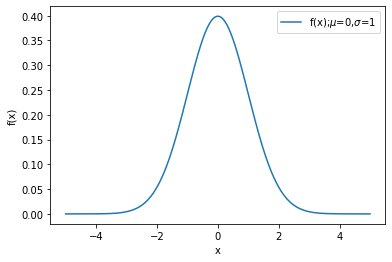

In [ ]:
# Omiti a visao acumulada para termos uma visao clara da distribuicao normal de media 0, desvio 1

import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

# tanto para pdf como para pdf, temos que o 2o parâmetro é a média
# e o 3o parâmetro é o desvio
y_pdf = ss.norm.pdf(x, 0, 1) # pdf da normal padrão
#y_cdf = ss.norm.cdf(x, 0, 1) # cdf da normal padrão


plt.plot(x, y_pdf, label=r'f(x);$\mu$=0,$\sigma$=1')
#plt.plot(x, y_cdf, label=r'F(x);$\mu$=0,$\sigma$=1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();

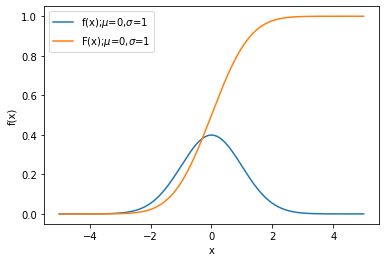

In [ ]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 5000)
mu = 0 #Media igual a 0
sigma = 1 #Desvio igual a 1

# tanto para pdf como para pdf, temos que o 2o parâmetro é a média
# e o 3o parâmetro é o desvio
y_pdf = ss.norm.pdf(x, 0, 1) # pdf da normal padrão => é a distribuição normal
y_cdf = ss.norm.cdf(x, 0, 1) # cdf da normal padrão => é a visão acumulada, que vai de 0 a 100%


plt.plot(x, y_pdf, label=r'f(x);$\mu$=0,$\sigma$=1') #Gerando o grafico da distribuicao normal
plt.plot(x, y_cdf, label=r'F(x);$\mu$=0,$\sigma$=1') #Gerando o grafico com a visao acumulada
plt.xlabel('x') #Eixo x - rotulo
plt.ylabel('f(x)') #Eixo y - rotulo
plt.legend();

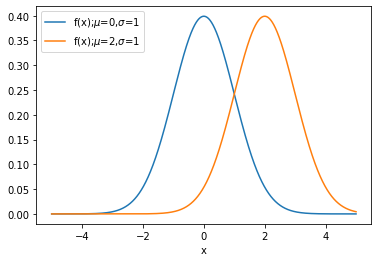

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

# tanto para pdf como para pdf, temos que o 2o parâmetro é a média
# e o 3o parâmetro é o desvio
y_pdf = ss.norm.pdf(x, 0, 1) # pdf da normal padrão
y2_pdf = ss.norm.pdf(x, 2, 1) # pdf da N(2, 1^2)
#y3_pdf = ss.norm.pdf(x, 0, 1.5) # pdf da N(0, 1.5^2)

plt.plot(x, y_pdf, label=r'f(x);$\mu$=0,$\sigma$=1')
plt.plot(x, y2_pdf, label=r'f(x);$\mu$=2,$\sigma$=1')
#plt.plot(x, y3_pdf, label=r'f(x);$\mu$=0,$\sigma$=1,5')
plt.xlabel('x')
#plt.ylabel('f(x)')
plt.legend();

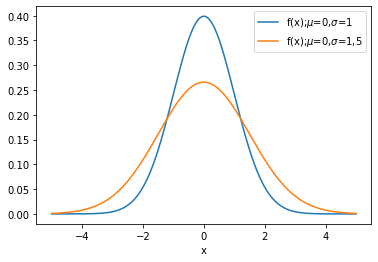

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

# tanto para pdf como para pdf, temos que o 2o parâmetro é a média
# e o 3o parâmetro é o desvio
y_pdf = ss.norm.pdf(x, 0, 1) # pdf da normal padrão
#y2_pdf = ss.norm.pdf(x, 2, 1) # pdf da N(2, 1^2)
y3_pdf = ss.norm.pdf(x, 0, 1.5) # pdf da N(0, 1.5^2)

plt.plot(x, y_pdf, label=r'f(x);$\mu$=0,$\sigma$=1')
#plt.plot(x, y2_pdf, label=r'f(x);$\mu$=2,$\sigma$=1')
plt.plot(x, y3_pdf, label=r'f(x);$\mu$=0,$\sigma$=1,5')
plt.xlabel('x')
#plt.ylabel('f(x)')
plt.legend();

Exemplos de cálculo da área da normal

Suponha a sua distribuição tenha média igual a 15.75 e desvio padrão igual a 1.3.

Qual a chance de:
1. P(X<=15)
2. P(13<=X<=15)
3. P(X>15)

In [ ]:
#ss.norm.cdf(VALOR, MEDIA, DESVIO)
ss.norm.cdf(50, 40, 5)-ss.norm.cdf(30, 40, 5)

0.9544997361036416

In [ ]:
# P(X<=15)
ss.norm.cdf(15, 15.75, 1.3)

0.28199571030898485

In [ ]:
# P(13<=X<=15)
ss.norm.cdf(15, 15.75, 1.3)-ss.norm.cdf(13, 15.75, 1.3)

0.26479712033736563

In [ ]:
# P(X>15)
1-ss.norm.cdf(15, 15.75, 1.3)

0.7180042896910152

#### Teste de Kolmogorov-Smirnov

Teste se duas distribuições diferentes possuem o mesmo comportamento.

Exemplo: stats.kstest(x, stats.norm.cdf)
Testamos se os dados (x) tem o mesmo comportamento de uma distribuição normal (stats.norm.cdf)

* Se pvalue for menor que 0.05, há evidências de que não é uma distribuição normal.
* Se pvalue for maior que 0.05, há evidências de que é uma distribuição normal.

Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [ ]:
from scipy.stats import kstest
rng = np.random.default_rng() #Gera uma semente aleatoria
x = stats.norm.rvs(size=100, random_state=rng) #Gera dados numa distribuicao normal de tamanho 100
x.sort() #Para ordenar os dados
stats.kstest(x, stats.norm.cdf) #Realizamos o teste

KstestResult(statistic=0.123542503087742, pvalue=0.08666256395939594)

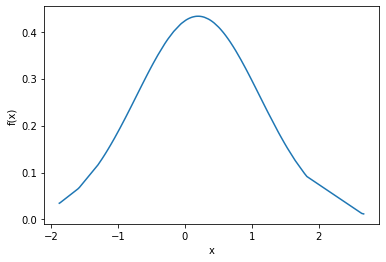

In [ ]:
y_pdf = ss.norm.pdf(x, x.mean(), x.std()) # pdf da normal padrão

plt.plot(x, y_pdf)
plt.xlabel('x')
plt.ylabel('f(x)');

In [ ]:
from numpy.random import seed

#mantendo a semente aleatoria igual a 0
seed(0)

#gerar uma distribuicao de Poisson com 100 elementos e média igual a 5
data = np.random.poisson(5, 100)
data.sort()

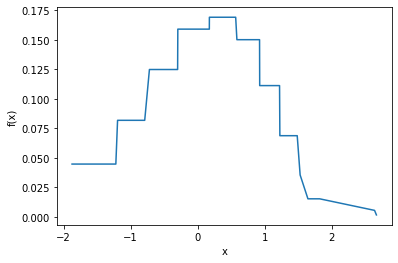

In [ ]:
y_pdf = ss.norm.pdf(data, data.mean(), data.std()) # pdf da normal padrão

plt.plot(x, y_pdf)
#plt.plot(x, y_cdf, label=r'F(x);$\mu$=0,$\sigma$=1')
plt.xlabel('x')
plt.ylabel('f(x)');

In [ ]:
stats.kstest(data, stats.norm.cdf) #Realizamos o teste e percebemos que não são a mesma. Logo, a distribuição data não é uma Normal.

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170218e-103)

#### Distribuição t de Student

Suponha uma distribuição t de student com media 0 e desvio 1 com 10 graus de liberdade.

Responda:
1. P(X>2)
2. P(X<=2)
3. P(-1<=X<=1)

In [ ]:
from scipy.stats import t
#P(X>2)
1-t.cdf(x=2, df=10, loc=0, scale=1) #df = degree of freedom (graus de liberdade) com media 0 e desvio 1

0.03669401738537026

In [ ]:
#P(X<=2)
t.cdf(x=2, df=10, loc=0, scale=1) #df = degree of freedom (graus de liberdade) com media 0 e desvio 1

0.9633059826146297

In [ ]:
#P(-1<=X<=1)
t.cdf(x=1, df=10, loc=0, scale=1)-t.cdf(x=-1, df=10, loc=0, scale=1)

0.6591068676979399

### Atividades

EXERCICIO 1

Você e seu amigo estão participando de uma rifa.

Nessa rifa, há 50 números a serem sorteados.

Você escolheu o número 23 por R$ 10,00

Seu amigo escolheu os números 10 e 15 por R$ 20,00.


Responda as questões abaixo:
1. Qual a probabilidade de você ser sorteado?
2. Qual a probabilidade do seu amigo ser sorteado?
3. Qual a probabilidade de vocês dois **não** serem sorteados?

In [ ]:
#1
1 / 50

0.02

In [ ]:
#2
2 / 50

0.04

In [ ]:
#3
1 - ( (1 / 50) + (2 / 50) )

0.94

EXERCICIO 2

Você trabalha numa empresa de telemarketing. Essa empresa oferece opções de crédito/empréstimo por telefone.

A área estratégica precisa estimar quantas vendas serão realizadas em 2022 e pediu para que você construa um cenário pessimista, um cenário moderado e um cenário otimista.

Há quatro atendentes na loja. Sabemos que é muito difícil ninguém vender ou todos venderem e, por isso, esses cenários não serão apresentados.

Sabemos que:
* A empresa possui 4 atendentes
* Historicamente, a taxa de venda é de 40%
* Considere que em 2022 nossa meta é de oferecer 1.000 empréstimos de R$ 10.000.

Para cada cenário, responda qual a chance do respectivo cenário acontecer, quantos empréstimos devemos vender e quanto faturaremos.

In [ ]:
n = 4 #Quantidade de Vezes que o evento pode acontecer
p = 0.4 #Probabilidade do evento acontecer

#Daqui para frente, não precisa modificar
eventos_freq = list(range(n + 1)) #Crio uma lista de 0 até a quantidade de vezes que o evento pode acontecer
dist = [binom.pmf(r, n, p) for r in eventos_freq ] #Calculando a probabilidade por frequencia do evento num loop for
print("freq\tp(X = freq)")
for i in range(n + 1): #Loop for para trazer as frequencia e probabilidades
    print(str(eventos_freq[i]) + "\t" + str(dist[i]))

freq	p(X = freq)
0	0.1296
1	0.3456
2	0.3456
3	0.15360000000000001
4	0.025600000000000005


In [ ]:
#Cenario 1: 1 venda  a cada 4 atendentes | Chance de 34.56% | Volume de vendas 1.000 * (1/4) = 250 | Faturamento de R$ 2.500.000
#Cenario 2: 2 vendas a cada 4 atendentes | Chance de 34.56% | Volume de vendas 1.000 * (2/4) = 500 | Faturamento de R$ 5.000.000
#Cenario 3: 3 vendas a cada 4 atendentes | Chance de 15.36% | Volume de vendas 1.000 * (3/4) = 750 | Faturamento de R$ 7.500.000

EXERCICIO 3

Você trabalha numa empresa de telemarketing. Essa empresa realiza a cobrança de dívidas por telefone.

Sabe-se que, em média, conseguimos que 6 clientes realizem um pagamento por hora.

A área estratégica precisa estimar quantas dívidas serão pagas em 2022 e pediu para que você construa um cenário pessimista (4 clientes paguem por hora), um cenário moderado (6 clientes paguem por hora) e um cenário otimista (8 clientes paguem por hora).

Sabemos que:
* A média de clientes que pagam por hora é igual a 6.
* Considere que em 2022 esperamos que cada cliente pague, em média, R$ 1.000 em dívidas.

Para cada cenário, responda qual a chance do respectivo cenário acontecer e quanto esperamos faturar por hora.

In [ ]:
media_no_periodo = 6
Acumulada = 0
i = 0
while Acumulada<0.99:
  probabilidade = poisson.pmf(i, media_no_periodo)
  print(f'Probabilidade de {i} evento: {probabilidade:.2f} || acumulada: {Acumulada:.2f}')
  Acumulada,i = Acumulada+probabilidade,i+1

Probabilidade de 0 evento: 0.00 || acumulada: 0.00
Probabilidade de 1 evento: 0.01 || acumulada: 0.00
Probabilidade de 2 evento: 0.04 || acumulada: 0.02
Probabilidade de 3 evento: 0.09 || acumulada: 0.06
Probabilidade de 4 evento: 0.13 || acumulada: 0.15
Probabilidade de 5 evento: 0.16 || acumulada: 0.29
Probabilidade de 6 evento: 0.16 || acumulada: 0.45
Probabilidade de 7 evento: 0.14 || acumulada: 0.61
Probabilidade de 8 evento: 0.10 || acumulada: 0.74
Probabilidade de 9 evento: 0.07 || acumulada: 0.85
Probabilidade de 10 evento: 0.04 || acumulada: 0.92
Probabilidade de 11 evento: 0.02 || acumulada: 0.96
Probabilidade de 12 evento: 0.01 || acumulada: 0.98


EXERCICIO 4

Suponha que o tempo de atendimento de uma consulta siga uma Distribuição Exponencial.

Sabemos que a duração da consulta é, em média 15 minutos.

Calcule as seguintes probabilidades:
1. P(Atendimento> 8 minutos)
2. P(Atendimento <= 12 minutos)
3. P(8 <= Atendimento <= 14)

In [ ]:
#1
1-expon.cdf(8, loc=0, scale=15) #Calcula P(X>8) sabendo que em media a duração é de 15 minutos

0.5866462195100318

In [ ]:
#2
expon.cdf(12, loc=0, scale=15) #Calcula P(X<=12) sabendo que em media a duração é de 15 minutos

0.5506710358827784

In [ ]:
#3
expon.cdf(14, loc=0, scale=15)-expon.cdf(8, loc=0, scale=15) #Calcula P(14<=X<=8) sabendo que em media a duração é de 15 minutos

0.19340549864143364

EXERCICIO 5

Considere uma distribuição t de student com 20 graus de liberdade

Calcule:
1. P(X>1.397)
2. P(X<=-1.96)
3. P(-2<=X<=-1)

In [ ]:
#1
1-t.cdf(x=1.397, df=10, loc=0, scale=1)

0.09631970386779376

In [ ]:
#2
t.cdf(x=-1.96, df=10, loc=0, scale=1)

0.03921812012384987

In [ ]:
#3
t.cdf(x=-1, df=10, loc=0, scale=1)-t.cdf(x=-2, df=10, loc=0, scale=1)

0.13375254876565984

EXERCICIO 6

Compare os resultados da Distribuição Normal com a t de Student.

Sabemos que Z = 1.96 representa um erro de 5%, sendo 2,5% em cada extremo. Por isso, o código abaixo resulta em 2.5%
```
ss.norm.cdf(-1.96, 0, 1)
```

Realize um teste comparando o resultado de uma normal (código acima) versos uma t de student, como o código abaixo:
```
t.cdf(x=-1.96, df=GL, loc=0, scale=1)
```

Modifique o valor de GL para 5,10,15,20,25,30,60,120,1.000, 10.000.

O que podemos perceber?

Dica: Utilize um laço de repetição for

In [ ]:
for gl in [5,10,15,20,25,30,60,120,1000,10000]:
  normal = ss.norm.cdf(-1.96, 0, 1)
  student = t.cdf(x=-1.96, df=gl, loc=0, scale=1)
  print(f'Normal: {normal:.4f} e t de Student:{student:.4f} com {gl} graus de liberdade')

# Percebemos que quanto mais dados temos, maior a aproximação da distribuição t de student com a normal.

Normal: 0.0250 e t de Student:0.0536 com 5 graus de liberdade
Normal: 0.0250 e t de Student:0.0392 com 10 graus de liberdade
Normal: 0.0250 e t de Student:0.0344 com 15 graus de liberdade
Normal: 0.0250 e t de Student:0.0320 com 20 graus de liberdade
Normal: 0.0250 e t de Student:0.0306 com 25 graus de liberdade
Normal: 0.0250 e t de Student:0.0297 com 30 graus de liberdade
Normal: 0.0250 e t de Student:0.0273 com 60 graus de liberdade
Normal: 0.0250 e t de Student:0.0262 com 120 graus de liberdade
Normal: 0.0250 e t de Student:0.0251 com 1000 graus de liberdade
Normal: 0.0250 e t de Student:0.0250 com 10000 graus de liberdade


# Aula 03 - Introdução a Numpy e Pandas

###### Nessa aula não foi apresentado nenhum conceito que pudesse ser aplicado ao Google Colab. Foi dado apenas a teoria.

# Aula 04 - Tabelas de Frequência e Missings

## Importando as bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import statistics
from scipy import stats
from collections import Counter

## Lendo o Banco de Dados

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Nosso objeto de estudo é entender o comportamento da variável price. O primeiro passo é nos basearmos nela.

In [ ]:
df.price.describe()

## Analisando os dados

### Identificando cada tipo de variavel

In [ ]:
df.columns # Para identificar cada coluna da tabela (df: data frame = tabela)

In [ ]:
df.dtypes # Para saber o tipo de variavel em cada coluna

### Analisando as variáveis do tipo **Texto**

#### Quantidade de valores únicos

* Nota: os códigos são exemplos. No código abaixo, considerei que se a coluna apresentar até 10 valores distintos, analisaremos direto. Isso não é uma regra. Cabe ao estudante entender o conceito e ter essa sensibilidade na hora de analisar. **Uma técnica que pode ser útil é utilizar o conteúdo de _amostragem_ para embasar as decisões**.

In [ ]:
colString_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'object': #se for do tipo texto
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') #dou um print para ver quantas valores distintos nós temos
    if len(df[coluna].unique()) <= 10: #Se for até 10 valores distintos
      colString_analisar.append(coluna) #Entao eu ja sei que dá para analisar com mais facilidade

#### Tratar a(s) variáveis excluídas para também analisá-las

In [ ]:
list(df.CarName.unique())[0:10] #Podemos perceber que o primeiro termo da base é a MARCA do veículo.

In [ ]:
# Crie uma lista com a marca de cada linha da tabela.

**EXERCICIO**

* Crie uma linha varia denominada **marca**
* Para cada CarName da tabela, colete apenas a respectiva marca e adiciona na tabela
* Utilize o exemplo de código abaixo para adicionar essa coluna na sua tabela
```
df['marca'] = marca
```
* Adicione o nome da coluna 'marca' na tabela de variáveis do tipo texto que vamos analisar


In [ ]:
marca = []

for indice in range(0,len(df)):
  marca.append(df.CarName[indice].split()[0])

In [ ]:
df['marca'] = marca #Criando uma coluna nova na tabela
df.head()

In [ ]:
print(f'Na coluna marca temos {len(list(df.marca.unique()))} marcas distintas. São elas:{list(df.marca.unique())}')

**EXERCICIO**

Consideramos que 28 marcas ainda é um volume alto. Realizaremos o seguinte ajuste na coluna:
* As marcas que representarem no mínimo 5% da base serão mantidas. As demais, farão parte da classe "outros"

In [ ]:
dict(df.marca.value_counts())

In [ ]:
marca2 = []
for idx in range(0,len(marca)):
  if dict(df.marca.value_counts())[marca[idx]] < int(len(df)*0.05):
    marca2.append('outros')
  else:
    marca2.append(marca[idx])

In [ ]:
df['marca2'] = marca2
dict(df.marca2.value_counts())

#### Agrupamento de Dados

* A função groupby permite que agrupemos os dados a partir de alguma função
Exemplo:
```
df.groupby([VARIAVEL_EXPLICATIVA])['VARIAVEL_RESPOSTA'].FUNCAO()
```

> A variável explicativa refere-se a uma (ou mais) variável que queremos analisar. **Por qual coluna vamos subdividir a análise**

> A variável resposta é uma variável int ou float cuja compreensão do comportamento perando a variável explicativa é o nosso objeto de estudo. **O que está sendo agrupado**

> A funcao é o como estaremos agrupando os dados. Pode ser uma soma, uma média, uma mediana, uma contagem, desvio padrão, entre outros. **Como vamos analisar**

* Ao unir com a função agg, a gente define como que queremos visualizar as agregações. Em outras palavras, selecionamos uma lista de "funções" conforme explicado acima.

**DOCUMENTAÇÃO:**
[Groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), [Agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

**Funções mais utilizadas**:
mean, median, prod, sum, std,var,count

In [ ]:
df.groupby(['marca2'])['price'].mean()
# marca2 é a coluna que estamos analisando ("por qual coluna estamos subdividindo")
# Price é a variável que será agrupada ("o que está sendo agrupado")
# mean significa média ("é o como estamos agrupando")

In [ ]:
resumo = df.groupby(['marca2'])['price'].agg(['mean','count'])
resumo #Percebe que a coluna marca2 passa a ser o indice

In [ ]:
resumo = resumo.reset_index() #podemos resetar o indice, transformando maca2 novamente numa coluna
resumo

**EXERCICIO**

Considere que a média dos preços de venda é igual a R$ 13.276.

1. Quais marcas parecem vender mais caro que outras?

2. Quais marcas parecem vender mais barato que outras?

3. A variável outros representa que % do total de dados?

4. Crie a variável marca3. Dessa vez, se a marca representar menos que 5%, vamos tomar a seguinte decisão:


> * Se a **média do preço de venda dessa marca** for <= 13276, então classificaremos como "marca_barata"
> * Caso contrário, classificaremos como "marca_cara"

5. Analise a variável marca3.

6. Analise de maneira univariada as colunas que não envolvam marca contidas na variável ```colString_analisar```. Quais as variáveis que explicam o comportamento do preço ser acima ou abaixo da média e por que?






### Analisando as variáveis numericas

#### Distribuição de Frequência

In [ ]:
colInt_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'int64': #se for do tipo texto
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') #dou um print para ver quantas valores distintos nós temos
    if len(df[coluna].unique()) <= 10: #Se for até 10 valores distintos
      colInt_analisar.append(coluna) #Entao eu ja sei que dá para analisar com mais facilidade

In [ ]:
resumo = df.groupby(['symboling'])['price'].agg(['count'])
resumo = resumo.reset_index() #podemos resetar o indice, transformando maca2 novamente numa coluna
resumo

In [ ]:
resumo['count'].sum()

In [ ]:
# Criando a frequencia Relativa
resumo['Freq.Relativa'] = resumo['count']/resumo['count'].sum()
resumo['Freq.Relativa%'] = round(resumo['Freq.Relativa']*100,2)
resumo

A Variável Symboling é de -3 a 3. No qual -3 significa que o carro é **mais seguro** e +3 significa que ele é **menos seguro**

Sendo assim, podemos observar que:
Os casos mais seguros (-2 e -1) representam cerca de 12% dos dados
Os casos neutros (0) representam cerca de 33%
E os demais 55% são de carros menos seguros.

In [ ]:
df.groupby(['symboling'])['price'].agg(['mean'])

Analisando o preço médio, os carros
* -1 e 3 apresentam um preço parecido
* 0 apresentam um preço intermediário
* 1 e 2 apresentam um preço mais baixo

*Apenas o -2 apresenta uma amostra abaixo de muito baixa (menor que 5%) e, por isso, não devemos chegar a conclusões.* Uma sugestão seria de agrupar -2 e -1.

**EXERCICIO**

1. Para a variávei symboling, agrupe -2 e -1 e observe as frequências, assim como o preço médio.

2. Para as demais variáveis (**exceto car_ID**), faremos o seguinte:

> A. Identificaremos os valores Máximos e Mínimos

> B. Neste exemplo, vamos sempre separar em 5 faixas. O "passo" de cada faixa será (Máximo-Mínimo)/5. Logo a faixa 1 será "Valor Mínimo Até (Valor Mínimo + Passo);  faixa 2 será "(Valor Mínimo + Passo) até (Valor Mínimo + 2*Passo); ...

**Dica**
Para criar as colunas, podemos fazer o seguinte:
```
df.loc[(df.VARIAVEL >= 0) & (df.VARIAVEL < 100), 'COLUNA_NOVA_NOME'] = '1. De 0 a 100'
```

**Quais variáveis parecer explicar o preço dos automóveis?**



In [ ]:
colInt_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'int64': #se for do tipo texto
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') #dou um print para ver quantas valores distintos nós temos
    if len(df[coluna].unique()) > 10 and coluna != 'car_ID': #Se for até 10 valores distintos
      colInt_analisar.append(coluna) #Entao eu ja sei que dá para analisar com mais facilidade

In [ ]:
novas_colunas = []
faixas = 5
for coluna in colInt_analisar:
  min = df[coluna].min()
  max = df[coluna].max()
  passo =  int((max-min)/faixas)
  colname = 'fx_'+coluna
  for i in range(0,faixas):
    df.loc[(df[coluna] >= (min+(i*passo))) & (df[coluna] < (min+((i+1)*passo))), colname] = f'{i+1}. De {(min+(i*passo)):.2f} a {(min+((i+1)*passo)):.2f}'
  novas_colunas.append(colname)

In [ ]:
novas_colunas

In [ ]:
for coluna in novas_colunas:
  resumo = df.groupby([coluna])['price'].agg(['mean','count'])
  resumo = resumo.reset_index() #podemos resetar o indice, transformando maca2 novamente numa coluna
  resumo['Freq.Relativa'] = resumo['count']/resumo['count'].sum()
  resumo['Freq.Relativa%'] = round(resumo['Freq.Relativa']*100,2)
  print(resumo,'\n-----\n')

### Valores Missing

Para identificarmos os dados missings, podemos:
1. Observar a representatividade dos dados ausentes de maneira proporcional, ou seja, (volume missing / volume de registros)*100
2. Avaliar graficamente o comportamento dos dados missing

Para tratarmos os dados missings, podemos:
1. Eliminar o dado missing, vide a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
2. Preencher o dado missing, vide a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
def Conferir_Missing(df):
  for col in df.columns:
    print(col, str(round(100* df[col].isnull().sum() / len(df), 2)) + '%')

In [ ]:
Conferir_Missing(df)

#### Visualização Gráfica

[Inspiração visualização gráfica](https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea)

In [ ]:
import missingno as msno
%matplotlib inline

In [ ]:
msno.bar(df[list(df.columns)[27:34]])

In [ ]:
msno.matrix(df[list(df.columns)[27:34]])

#### Remoção de dados missing

In [ ]:
import numpy as np

exemplo = pd.DataFrame({"Cliente": ['Ana', 'Bernardo', 'Catarina','Rodrigo'],
                   "Idade": [np.nan, 32, 25,55],
                   "Salário": [np.nan, 'Nao Informado',np.nan,np.nan],
                   "UF":[np.nan,'SP','RJ','MG']})

exemplo

In [ ]:
exemplo.dropna() #Sem qualquer parâmetro, dropna() remove qualquer linha que tenha ao menos 01 elemento faltante

In [ ]:
exemplo #Note que para sobrescrever a tabela, precisamos realizar exemplo = exemplo.dropna()

In [ ]:
exemplo.dropna(axis='columns') #O parâmetro axis é utilizado para especifica que queremos que as colunas sejam removidas (caso haja ao menos 1 elemento faltante)

In [ ]:
exemplo.dropna(axis='columns',thresh=2) #O parâmetro thresh indica quantos valores missing precisamos ter NO MINIMO para remover a linha ou coluna

In [ ]:
exemplo

In [ ]:
exemplo.dropna(axis='columns',thresh=2, inplace=True) #O parâmetro inplace vai permitir que a mudança sobrescreva a tabela original

In [ ]:
exemplo

#### Preenchimento de dado missing

Para preenchermos os dados missings, o primeiro passo é **compreender** o motivo pelo qual o dado é missing e sua representatividade.

Se for decidido que iremos preencher tal dado, podemos utilizar a função fillna(), vide a [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

Muitas vezes, optamos por preencher os dados baseados nos seguintes critérios:
1. Para variáveis numéricas, podemos substituir por medidas, tais como média, mediana ou moda.
2. Para variáveis categóricas, podemos substituir pela variáveis mais frequênte
3. Dependendo do algoritmo que utilizaremos para treinar o nosso modelos, podemos também optar por substituir por um valor que não altere significativamente o resultado do nosso algoritmo. Por **exemplo**, o preço do imóvel aumenta se for localizado na região A, não é alterado se for na região B e diminui se for na região C. Talvez considerar as exceções como região B possa fazer sentido dado que remover a linha não foi uma opção.

In [ ]:
exemplo

In [ ]:
exemplo.Idade.mean()

In [ ]:
media_idade = int(exemplo.Idade.mean())
print(f'A media da idade é de {media_idade} anos')

Para preencher os dados, utilizaremos um [dicionário](https://www.hashtagtreinamentos.com/dicionarios-em-python?gclid=Cj0KCQjwjIKYBhC6ARIsAGEds-KpEfCbbvuJA01PCMPrJJjNlupD_orRW7z-RUWvSvlA9fWGsi5h4DkaAkNDEALw_wcB)

Em resumo, teremos a coluna e com qual informação deveremos substituir.


```
dicionario = {'coluna_1':'valorString_a_preencher',
              'coluna_2':valorNum_a_preencher}
```



In [ ]:
preenchimentos = {'Idade':media_idade,
                  'UF':'SP'}

preenchimentos

In [ ]:
preenchimentos['Idade']

In [ ]:
exemplo.fillna(value=preenchimentos)
#O parâmetro value permite que a gente especifique como vamos preencher os elementos faltantes para cada coluna
#A idade da Ana foi preenchida e a UF da Ana também foi preenchida

In [ ]:
exemplo #Note que a tabela não foi sobrescrita

In [ ]:
exemplo.fillna(value=preenchimentos,inplace=True) #Com o parâmetro inplace, sobrescrevemos a tabela
exemplo

EXERCICIOS

1. Quantas linhas serão removidas se utilizarmos o dropna() na df?
2. Para a df, se você fosse preencher os dados para as colunas faltantes, por quais dados você preencheria?

In [ ]:
#1
len(df)-len(df.dropna())

# Aula 05 - Medidas de posição

## Medidas de Posição

São apenas para variáveis quantitativas

In [ ]:
colNum_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'int64' or df[coluna].dtype == 'float64': #se for do tipo int ou float
    colNum_analisar.append((coluna,str(df[coluna].dtype))) #Entao eu ja sei que dá para analisar com mais facilidade

print(colNum_analisar)

[('car_ID', 'int64'), ('symboling', 'int64'), ('wheelbase', 'float64'), ('carlength', 'float64'), ('carwidth', 'float64'), ('carheight', 'float64'), ('curbweight', 'int64'), ('enginesize', 'int64'), ('boreratio', 'float64'), ('stroke', 'float64'), ('compressionratio', 'float64'), ('horsepower', 'int64'), ('peakrpm', 'int64'), ('citympg', 'int64'), ('highwaympg', 'int64'), ('price', 'float64')]


### Moda
A moda é utilizada para variáveis quantitativas discretas (números inteiros)

In [ ]:
for tupla in colNum_analisar:
  if tupla[1] == 'int64':
    moda = stats.mode(df[tupla[0]])
    print(f'Para a coluna {tupla[0]}, a moda é {moda}')

Para a coluna car_ID, a moda é ModeResult(mode=array([1]), count=array([1]))
Para a coluna symboling, a moda é ModeResult(mode=array([0]), count=array([67]))
Para a coluna curbweight, a moda é ModeResult(mode=array([2385]), count=array([4]))
Para a coluna enginesize, a moda é ModeResult(mode=array([92]), count=array([15]))
Para a coluna horsepower, a moda é ModeResult(mode=array([68]), count=array([19]))
Para a coluna peakrpm, a moda é ModeResult(mode=array([5500]), count=array([37]))
Para a coluna citympg, a moda é ModeResult(mode=array([31]), count=array([28]))
Para a coluna highwaympg, a moda é ModeResult(mode=array([25]), count=array([19]))


In [ ]:
print(Counter(df['symboling']))

Counter({0: 67, 1: 54, 2: 32, 3: 27, -1: 22, -2: 3})


### Média

In [ ]:
for tupla in colNum_analisar:
  media = df[tupla[0]].mean()
  print(f'Para a coluna {tupla[0]}, a media é {media:.2f}')

Para a coluna car_ID, a media é 103.00
Para a coluna symboling, a media é 0.83
Para a coluna wheelbase, a media é 98.76
Para a coluna carlength, a media é 174.05
Para a coluna carwidth, a media é 65.91
Para a coluna carheight, a media é 53.72
Para a coluna curbweight, a media é 2555.57
Para a coluna enginesize, a media é 126.91
Para a coluna boreratio, a media é 3.33
Para a coluna stroke, a media é 3.26
Para a coluna compressionratio, a media é 10.14
Para a coluna horsepower, a media é 104.12
Para a coluna peakrpm, a media é 5125.12
Para a coluna citympg, a media é 25.22
Para a coluna highwaympg, a media é 30.75
Para a coluna price, a media é 13276.71


### Mediana

In [ ]:
for tupla in colNum_analisar:
  mediana = statistics.median(df[tupla[0]])
  print(f'Para a coluna {tupla[0]}, a media é {mediana:.2f}')

Para a coluna car_ID, a media é 103.00
Para a coluna symboling, a media é 1.00
Para a coluna wheelbase, a media é 97.00
Para a coluna carlength, a media é 173.20
Para a coluna carwidth, a media é 65.50
Para a coluna carheight, a media é 54.10
Para a coluna curbweight, a media é 2414.00
Para a coluna enginesize, a media é 120.00
Para a coluna boreratio, a media é 3.31
Para a coluna stroke, a media é 3.29
Para a coluna compressionratio, a media é 9.00
Para a coluna horsepower, a media é 95.00
Para a coluna peakrpm, a media é 5200.00
Para a coluna citympg, a media é 24.00
Para a coluna highwaympg, a media é 30.00
Para a coluna price, a media é 10295.00


### Interpretando a Média, Mediana e Moda
[Fonte da Imagem](https://slideplayer.com.br/slide/13265100/79/images/44/Assimetria+Distribui%C3%A7%C3%A3o+Sim%C3%A9trica+Assimetria+%C3%A0+direita+ou+positiva.jpg)

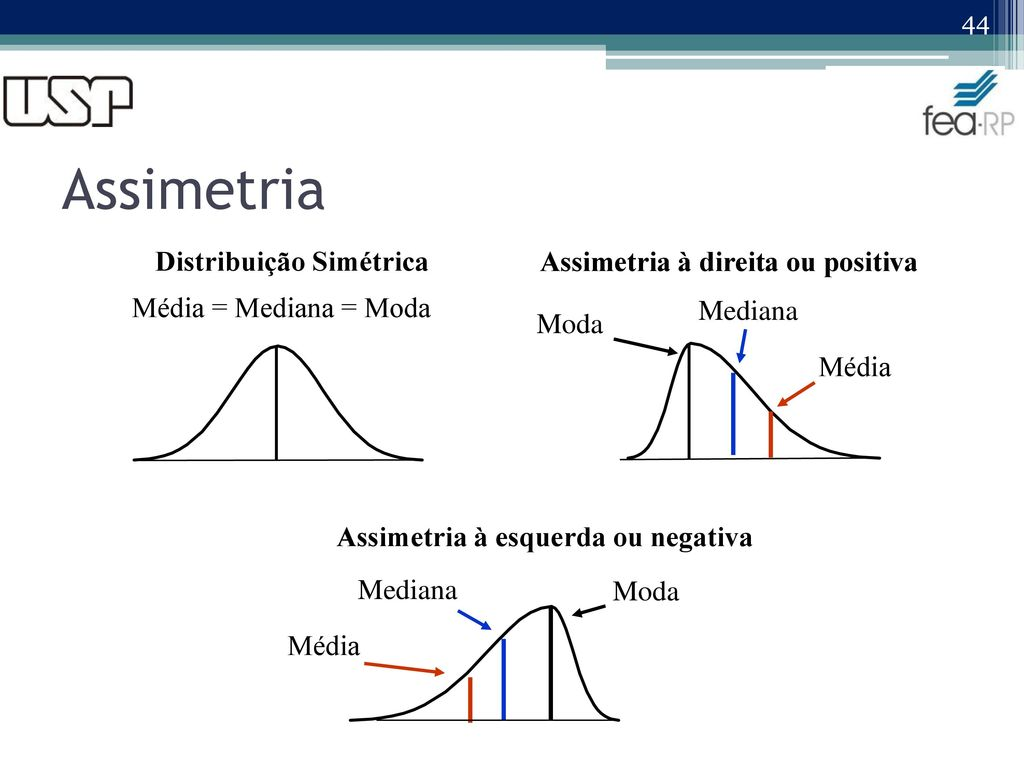

* Simetria: quando a média e a mediana são muito próximas, isso significa que a metade dos dados com **valores baixos** tem uma representatividade **similar aos** dados com **valores altos**
* Assimetria à Direita: significa que **valores baixos** tem maior representatividade. Por isso, a mediana se torna menor que a média.
* Assimetria à Esquerda: significa que **valores altos** tem maior representatividade. Por isso, a mediana se torna maior que a média.

In [ ]:
for tupla in colNum_analisar:
  media = df[tupla[0]].mean()
  mediana = statistics.median(df[tupla[0]])

  if mediana > media:
    print(f'Para a coluna {tupla[0]}, a media é {media:.0f} e a mediana é de {mediana:.0f}. Var de {(media-mediana)/media:.4f}')

Para a coluna symboling, a media é 1 e a mediana é de 1. Var de -0.1988
Para a coluna carheight, a media é 54 e a mediana é de 54. Var de -0.0070
Para a coluna stroke, a media é 3 e a mediana é de 3. Var de -0.0106
Para a coluna peakrpm, a media é 5125 e a mediana é de 5200. Var de -0.0146


Simetrico

Para a coluna carheight, a media é 54 e a mediana é de 54.
Para a coluna stroke, a media é 3 e a mediana é de 3.
-----



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd1d299810>,
      dtype=object)

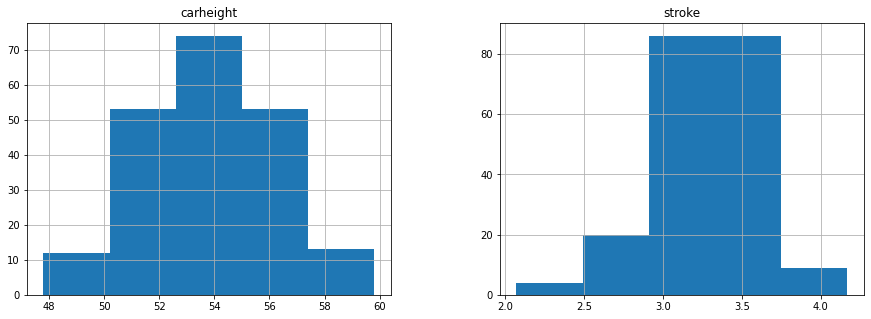

In [ ]:
colunas = ['carheight','stroke']
for col in colunas:
  media = df[col].mean()
  mediana = statistics.median(df[col])
  print(f'Para a coluna {col}, a media é {media:.0f} e a mediana é de {mediana:.0f}.')

print('-----\n')
df.hist(column=colunas,bins=5,figsize=(15,5)) #A parte de gráficos será abordada nas proximas aulas

Assimetria a Esquerda

Para a coluna symboling, a media é 1 e a mediana é de 1.
-----



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd1d18cb50>]],
      dtype=object)

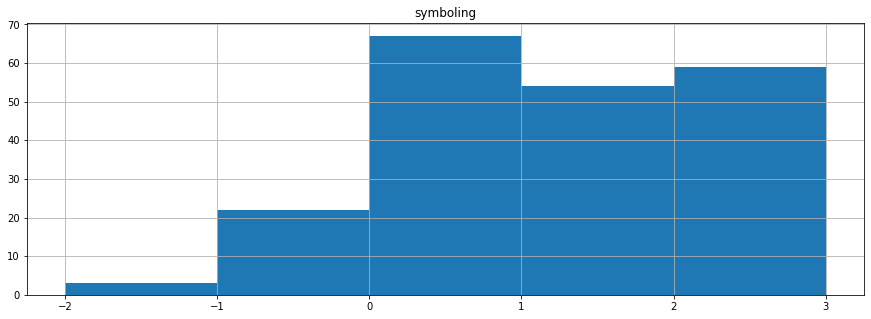

In [ ]:
colunas = ['symboling']
for col in colunas:
  media = df[col].mean()
  mediana = statistics.median(df[col])
  print(f'Para a coluna {col}, a media é {media:.0f} e a mediana é de {mediana:.0f}.')

print('-----\n')
df.hist(column=colunas,bins=5,figsize=(15,5)) #A parte de gráficos será abordada nas proximas aulas

Assimetria a Direita

Para a coluna price, a media é 13277 e a mediana é de 10295.
-----



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd1d134990>]],
      dtype=object)

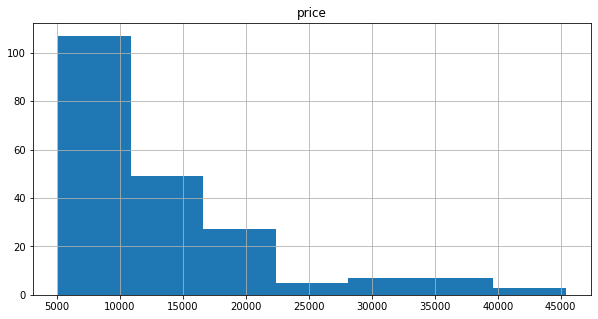

In [ ]:
colunas = ['price']
for col in colunas:
  media = df[col].mean()
  mediana = statistics.median(df[col])
  print(f'Para a coluna {col}, a media é {media:.0f} e a mediana é de {mediana:.0f}.')

print('-----\n')
df.hist(column=colunas,bins=7,figsize=(10,5)) #A parte de gráficos será abordada nas proximas aulas

### Percentil e valores máximos e mínimos

Podemos usar a biblioteca numpy para obter o percentil

```
np.percentile(VALORES,PERCENTIL)
```
Onde,
* Valores: uma lista de números
* Percentil: valor de 0 a 100.
* Percentil 0: valor mínimo
* Percentil 100: valor máximo



In [ ]:
for percentil in range(0,101,10): #Para os percentis de 0 a 100, com 10 passos
  p = np.percentile(df.price,percentil) #df.price sao todos os precos || percentil é o valor a cada loop do for
  print(f'Percentil: {percentil} é de {p:.2f}')

Percentil: 0 é de 5118.00
Percentil: 10 é de 6657.00
Percentil: 20 é de 7385.80
Percentil: 30 é de 8022.00
Percentil: 40 é de 9036.60
Percentil: 50 é de 10295.00
Percentil: 60 é de 12515.60
Percentil: 70 é de 15458.00
Percentil: 80 é de 17493.80
Percentil: 90 é de 22563.00
Percentil: 100 é de 45400.00


Outra maneira é obtendo através do pandas, utilizando a função ``` describe() ```

Nela podemos parametrizar quais percentis queremos observar.

Exemplo:
``` df.describe(percentiles=[0,0.20,0.99]) ```

Passamos na **lista** quais os percentis que queremos observar.




In [ ]:
df.describe(percentiles=[.21,.33,.98,.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
21%,43.840000,0.000000,94.500000,165.552000,64.000000,51.600000,2091.920000,97.000000,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,25.000000,7493.240000
33%,68.320000,0.000000,95.700000,168.932000,64.400000,52.600000,2275.000000,108.000000,3.190000,3.150000,8.864000,82.000000,4832.000000,22.000000,27.320000,8387.120000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
98%,200.920000,3.000000,114.200000,199.568000,71.676000,59.068000,3768.400000,256.080000,3.780000,3.896800,22.976000,206.440000,6000.000000,38.000000,46.920000,36809.600000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Valores máximos e mínimos pelo pandas

In [ ]:
df.price.min()

5118.0

In [ ]:
df.price.max()

45400.0

### Valores Discrepantes (outliers)

In [ ]:
Q1 = np.percentile(df.price,25)
Q3 = np.percentile(df.price,75)

In [ ]:
#Limite Inferior:
LI = Q1 - (1.5*(Q3-Q1))
LI

-5284.5

In [ ]:
#Limite Superior
LS = Q3 + (1.5*(Q3-Q1))
LS

29575.5

In [ ]:
mask = (df.price > LS)
outliers_LS = df.price[mask]

In [ ]:
mask = (df.price < LI)
outliers_LI = df.price[mask]

In [ ]:
outliers_LS

15     30760.0
16     41315.0
17     36880.0
47     32250.0
48     35550.0
49     36000.0
70     31600.0
71     34184.0
72     35056.0
73     40960.0
74     45400.0
126    32528.0
127    34028.0
128    37028.0
129    31400.5
Name: price, dtype: float64

In [ ]:
len(outliers_LS) # Ha 15 outliers no limite superior

15

In [ ]:
len(outliers_LS) / len(df) # Os outliers representam 7% da base.

0.07317073170731707

In [ ]:
outliers_LI #Nao há outlier para o limite inferior

Series([], Name: price, dtype: float64)

# Aula 06 - Medidas de dispersão

## Medidas de Dispersão

São apenas para variáveis quantitativas

**Documentações**:
* Variância e Desvio (populacional e amostral): [pacote statistics](https://docs.python.org/pt-br/3/library/statistics.html#module-statistics)

### Variância Amostral

In [ ]:
df.price.var() #Com o pandas

63821761.57839796

In [ ]:
statistics.variance(df.price) #Com o pacote estatístico

63821761.578397945

### Desvio Padrão Amostral

In [ ]:
df.price.std() #Com o pandas

7988.85233174315

In [ ]:
statistics.stdev(df.price)

7988.852331743149

### Variância Populacional

In [ ]:
statistics.pvariance(df.price)

63510435.91216186

### Desvio Padrão Populacional

In [ ]:
statistics.pstdev(df.price)

7969.3435057200195

Abaixos, podemos notar que quanto maior o numero de registro, maior a aproximação entre o **Desvio Padrão Populacional** e o **Desvio Padrão Amostral**

In [ ]:
for i in [1,10,100,1000]:
  dados = list(df.price)*i
  desvio_pop = statistics.pstdev(dados)
  desvio_am  = statistics.stdev(dados)
  print(f'Desvio Pop: {desvio_pop:.4f} e Desvio Amostral: {desvio_am:.4f} com {len(dados)} registros')

Desvio Pop: 7969.3435 e Desvio Amostral: 7988.8523 com 205 registros
Desvio Pop: 7969.3435 e Desvio Amostral: 7971.2880 com 2050 registros
Desvio Pop: 7969.3435 e Desvio Amostral: 7969.5379 com 20500 registros
Desvio Pop: 7969.3435 e Desvio Amostral: 7969.3629 com 205000 registros


EXERCÍCIO

1. Analise, para cada variável categórica, se a variabilidade entre os grupos é igual para a variável **price**. Quais grupos chamam mais atenção?
2. Em relação ao exercício anterior, esse grupos apresentam a mesma média?

In [ ]:
colString_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'object': #se for do tipo texto
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') #dou um print para ver quantas valores distintos nós temos
    if len(df[coluna].unique()) <= 10: #Se for até 10 valores distintos
      colString_analisar.append(coluna) #Entao eu ja sei que dá para analisar com mais facilidade

CarName: possui 147 valores unicos
fueltype: possui 2 valores unicos
aspiration: possui 2 valores unicos
doornumber: possui 2 valores unicos
carbody: possui 5 valores unicos
drivewheel: possui 3 valores unicos
enginelocation: possui 2 valores unicos
enginetype: possui 7 valores unicos
cylindernumber: possui 7 valores unicos
fuelsystem: possui 8 valores unicos
marca: possui 28 valores unicos
marca2: possui 9 valores unicos
fx_curbweight: possui 6 valores unicos
fx_enginesize: possui 6 valores unicos
fx_horsepower: possui 6 valores unicos
fx_peakrpm: possui 5 valores unicos
fx_citympg: possui 6 valores unicos
fx_highwaympg: possui 6 valores unicos


In [ ]:
for colString in colString_analisar:
  print(df.groupby([colString])['price'].agg(['std','count']),'\n-----\n')

                  std  count
fueltype                    
diesel    7759.843713     20
gas       7984.409306    185 
-----

                    std  count
aspiration                    
std         8214.342183    168
turbo       6098.889385     37 
-----

                    std  count
doornumber                    
four        7338.296321    115
two         8784.227805     90 
-----

                      std  count
carbody                         
convertible  11187.802193      6
hardtop      14555.520749      8
hatchback     4909.641988     70
sedan         8470.487812     96
wagon         5120.948695     25 
-----

                    std  count
drivewheel                    
4wd         3988.644756      9
fwd         3317.930730    120
rwd         9120.137883     76 
-----

                        std  count
enginelocation                    
front           7607.984118    202
rear            2291.287847      3 
-----

                     std  count
enginetype                    

### Coeficiente de Variação (CV)

In [ ]:
df.price.std() / df.price.mean()

0.6017192503506438

In [ ]:
statistics.stdev(df.price) / statistics.mean(df.price)

0.6017192503506437

EXERCÍCIO

1. Baseado no exercício anterior, analise se o CV da variável **price** entre cada um dos grupos de cada variável categórica.

In [ ]:
for colString in colString_analisar:
  resumo = df.groupby([colString])['price'].agg(['std','mean','count'])
  resumo['CV'] = resumo['std']/resumo['mean']
  resumo = resumo[['std','CV','count']]
  print(resumo,'\n-----\n')

                  std        CV  count
fueltype                              
diesel    7759.843713  0.489946     20
gas       7984.409306  0.614195    185 
-----

                    std        CV  count
aspiration                              
std         8214.342183  0.651349    168
turbo       6098.889385  0.374207     37 
-----

                    std        CV  count
doornumber                              
four        7338.296321  0.543531    115
two         8784.227805  0.676234     90 
-----

                      std        CV  count
carbody                                   
convertible  11187.802193  0.511080      6
hardtop      14555.520749  0.655403      8
hatchback     4909.641988  0.473143     70
sedan         8470.487812  0.590514     96
wagon         5120.948695  0.413916     25 
-----

                    std        CV  count
drivewheel                              
4wd         3988.644756  0.359744      9
fwd         3317.930730  0.359110    120
rwd         9120.13

* Carbody: hatchback apresentou o menor desvio, mas wagon apresentou o menor CV
* enginetype: ohcv apresentou o maior desvio, mas seu CV não foi o maior.

**Vários exemplos mostram que o desvio possui um comportamento diferente do CV.**

# Aula 07 - Visualização de dados

## Histograma


Estrutura:
```
fig = px.histogram(df, x, nbins)
```
* fig é o nome do objeto que você salvou o gráfico
* df é o nome da tabela onde seus dados estão
* x é o nome da coluna que você pretende analisar
* nbins é a quantidade de quebras que você pretende dividir seus dados
* **Opcional**: title é o título do gráfico, labels permite renomear as colunas, color permite avaliar a distribuição incluindo uma variável categórica, template permite alterar o layout.


```
fig.update_layout(bargap=0.2)
```
* bargap é a distância entre cada coluna. Normalmente um histograma mantém as colunas **juntas**.



```
fig.show()
```
* .show() serve para exibir o gráfico







[Documentação](https://plotly.com/python/histograms/)

[Algumas formatações adicionais](https://plotly.com/python/styling-plotly-express/)

### Visão univariada

In [ ]:
# Percebemos que o preço dos veículos é bem concentrado em valores mais baixos - principalmente até 20 mil dolares
# Preços acima de 40 mil dólares são bem raros
fig = px.histogram(df, x="price", nbins=10)
fig.show()

### Visão bivariada

In [ ]:
# Percebemos que o preço dos veículos é bem concentrado em valores mais baixos - principalmente até 20 mil dolares
# Preços acima de 40 mil dólares são bem raros
fig = px.histogram(df, x="price", nbins=20, title = 'Histograma',
                   labels = {'price':'preço'}, color = 'doornumber',
                   template="simple_white")
fig.add_shape( # add uma reta horizontal do tipo 'meta'
    type="line", line_color="black", line_width=1, opacity=1,
    x0=0, x1=1, xref="paper", y0=10, y1=10, yref="y" #A linha sera nos 10mil (y0 = 10 e y1 = 10)
)
fig.show()

EXERCÍCIO

1. Para as variáveis numéricas, quais apresentaram uma concentração em valores baixos, quais apresentaram simetria e quais apresentaram uma concentração em valores altos?

2. Separe a variável preço entre alto e baixo. Considere que **acima de 10.000 ou igual a 10.000 é alto** e **abaixo de 10.000 é baixo**. Elabora histogramas para as variáveis numéricas. Percebemos uma concentração diferente entre preços baixos e altos ao longo da distribuição das variáveis numéricas?

* A **mediana** é de aproximadamente 10.300 . Por isso, analisaremos acima de 10 mil ou abaixo de 10 mil.

In [ ]:
colIntFloat = []
for col in df.columns:
  if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col not in ['car_ID','symboling','price']:
    colIntFloat.append(col)

In [ ]:
#Exercicio 1
for col in colIntFloat:
  fig = px.histogram(df, x=col, nbins=7,template="simple_white")
  fig.show()

In [ ]:
#Exercicio 2
df.loc[df.price >= 10000, 'varPreco'] = 'Alto'
df.loc[df.price < 10000, 'varPreco'] = 'Baixo'

for col in colIntFloat:
  fig = px.histogram(df, x=col, nbins=7, color = 'varPreco',template="simple_white")
  fig.show()

## Gráfico de Barras

[Documentação](https://plotly.com/python/bar-charts/)

### Visão bivariada

In [ ]:
df.loc[(df.enginesize <= 91), 'fxEngineSize'] = 1
df.loc[(df.enginesize >  91) & (df.enginesize <= 97), 'fxEngineSize'] = 2
df.loc[(df.enginesize >  97) & (df.enginesize <= 98), 'fxEngineSize'] = 3
df.loc[(df.enginesize >  98) & (df.enginesize <=109), 'fxEngineSize'] = 4
df.loc[(df.enginesize > 109) & (df.enginesize <=120), 'fxEngineSize'] = 5
df.loc[(df.enginesize > 120) & (df.enginesize <=122), 'fxEngineSize'] = 6
df.loc[(df.enginesize > 122) & (df.enginesize <=136), 'fxEngineSize'] = 7
df.loc[(df.enginesize > 136) & (df.enginesize <=152), 'fxEngineSize'] = 8
df.loc[(df.enginesize > 152) & (df.enginesize <=181), 'fxEngineSize'] = 9
df.loc[df.enginesize > 181, 'fxEngineSize'] = 10

df.enginesize.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9]) #Quebrei em 10 faixas

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
10%       91.000000
20%       97.000000
30%       98.000000
40%      109.000000
50%      120.000000
60%      122.000000
70%      136.000000
80%      152.000000
90%      181.000000
max      326.000000
Name: enginesize, dtype: float64

In [ ]:
resumo = df.groupby(['fxEngineSize'])['price'].mean().reset_index()
resumo

,fxEngineSize,price
0,1.0,7673.043478
1,2.0,7276.413793
2,3.0,8170.857143
3,4.0,10013.909091
4,5.0,10661.761905
5,6.0,11150.523810
6,7.0,16493.877800
7,8.0,15679.130435
8,9.0,16659.473684
9,10.0,34273.083333


In [ ]:
fig = px.bar(resumo, x='fxEngineSize', y='price')
fig.show()

### Visão multivariada:
* 3 variáveis - eixo y (valor numérico), eixo x (variável categórica) e cor (variável categórica)

In [ ]:
resumo2 = df.groupby(['fxEngineSize','doornumber'])['price'].mean().reset_index()
resumo2

,fxEngineSize,doornumber,price
0,1.0,four,7003.611111
1,1.0,two,8103.392857
2,2.0,four,8131.000000
3,2.0,two,6582.062500
4,3.0,four,7849.833333
5,3.0,two,8411.625000
6,4.0,four,10171.400000
7,4.0,two,9676.428571
8,5.0,four,10972.187500
9,5.0,two,9668.400000


In [ ]:
fig = px.bar(resumo2, x='fxEngineSize', y='price', color="doornumber",template="simple_white")
fig.show()

Atividade

1. Para cada variável categórica, analise um gráfico de barras. A variável y será o preço e a variável x será a variável categórica.

2. Para cada variável numérica, faça o seguinte:
> * Quebre a variável numérica em 10 faixas, de acordo com seus percentis.
> * Para cada variável numérica que está quebrada em faixas, crie um gráfico de barras com y = price, x = var num quebrada em faixas e color = variável categórica

**Lembrete:** as variáveis categóricas da atividade 2 devem ter sido tratadas para manter uma volumetria representativa.

In [ ]:
colString = []
for col in df.columns:
  if (df[col].dtype == 'object') and col not in ['varPreco']:
    colString.append(col)

colString

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'marca',
 'marca2',
 'fx_curbweight',
 'fx_enginesize',
 'fx_horsepower',
 'fx_peakrpm',
 'fx_citympg',
 'fx_highwaympg']

In [ ]:
#1
for col in colString:
  resumo = df.groupby([col])['price'].mean().reset_index()
  fig = px.bar(resumo, x=col, y='price',template="simple_white")
  fig.show()

In [ ]:
import numpy as np

novas_colunas = []

for coluna in colIntFloat:
  if len(df[coluna].unique()) > 10:
    colname = 'fx_'+coluna
    i = 0
    for percentil in range(0,100,10):
      df.loc[(df[coluna] >= (np.percentile(df[coluna],percentil))) & (df[coluna] < (np.percentile(df[coluna],percentil+10))), colname] = f'{i}. De {((np.percentile(df[coluna],percentil))):.2f} a {((np.percentile(df[coluna],percentil+10))):.2f}'
      i = i+1
    novas_colunas.append(colname)
  else:
    novas_colunas.append(coluna)

In [ ]:
#2
for col in novas_colunas:
  resumo = df.groupby([col])['price'].mean().reset_index()
  fig = px.bar(resumo, x=col, y='price',template="simple_white")
  fig.show()

## Gráfico de Pizza

[Documentação](https://plotly.com/python/pie-charts/)

### Visão univariada

In [ ]:
resumo3 = df.groupby(['fxEngineSize'])['price'].count().reset_index()
resumo3

,fxEngineSize,price
0,1.0,23
1,2.0,29
2,3.0,14
3,4.0,22
4,5.0,21
5,6.0,21
6,7.0,15
7,8.0,23
8,9.0,19
9,10.0,18


In [ ]:
fig = px.pie(resumo3, values='price', names='fxEngineSize',
             labels={'price':'volumetria'},
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Cuidado** com o gráfico de pizza.
* O tamanho da fatia pode enganar - precisamos ler os rótulos
* As pessoas, em geral, levam mais tempo para conseguir chegar a conclusões observando um gráfico de pizza
* Uma alternativa é utilizar um gráfico de barras para ter maior clareza e agilidade de entendimento. Exemplo abaixo.

In [ ]:
fig = px.bar(resumo3, x='fxEngineSize', y='price',template="simple_white",labels={'price':'volumetria'})
fig.show()

## Boxplot

[Documentação](https://plotly.com/python/box-plots/)

### Visão univariada

In [ ]:
fig = px.box(df, y="price")
fig.show()

### Visão bivariada

In [ ]:
fig = px.box(df, y="price", x = "carbody",template="simple_white")
fig.show()

### Visão multivariada

In [ ]:
fig = px.box(df, y="price", x = "carbody", color="fueltype", template="simple_white")
fig.show()


ATIVIDADE

1. Quais variáveis numéricas possuem outlier?

2. Considere como eixo y a variável price. Crie boxplots para analisar cada variável categórica sendo o eixo x.

In [ ]:
#1
for col in colIntFloat:
  fig = px.box(df, y=col,template="simple_white")
  fig.show()

In [ ]:
#2
for col in colString:
  fig = px.box(df, y="price", x = col,template="simple_white")
  fig.show()

# Aula 08 - Distribuição normal e teste de hipótese

## Obtendo o Z

In [ ]:
def obter_Z(erro_alfa=0.05, dar_print=True,n_caudas=2):
  global z_crit
  # Erro é denominado alfa
  z_crit = stats.norm.ppf(1-(erro_alfa/n_caudas))
  if dar_print:
    print(f'Valor de Z: {z_crit:.2f} e armazenado na variavel global z_crit com um erro igual a {erro_alfa}') # O valor de Z é de aproximadamente 1.96 1.959963984540054

In [ ]:
vlr_z_1 = []
vlr_z_2 = []
vlr_erro = []
vlr_erro_div_2 = []

for cauda in [1,2]:
  for erro in [0.01,0.025,0.05,0.075,0.1]:
    obter_Z(erro_alfa=erro, dar_print=False,n_caudas=cauda)
    if cauda == 1:
      vlr_z_1.append(round(z_crit,2))
      vlr_erro.append(erro)
    else:
      vlr_z_2.append(round(z_crit,2))
      vlr_erro_div_2.append(round(erro/2,3))

In [ ]:
df = pd.DataFrame(list(zip(vlr_erro, vlr_z_1,vlr_erro_div_2,vlr_z_2)), # zip cria uma lista de tupla. Cada tupla equivale a uma linha da tabela
               columns =['Alpha', 'Z_Unilateral','Alpha_div_2','Z_Bilateral']) #determinando o nome das colunas na ordem

df

,Alpha,Z_Unilateral,Alpha_div_2,Z_Bilateral
0,0.010,2.33,0.005,2.58
1,0.025,1.96,0.013,2.24
2,0.050,1.64,0.025,1.96
3,0.075,1.44,0.037,1.78
4,0.100,1.28,0.050,1.64


## Teste de Hipótese Unilateral

[Gráfico](https://plotly.com/python/distplot/)

[Anotaçoes no gráfico](https://plotly.com/python/text-and-annotations/)

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exercícios

Considere a variável wheelbase com média 98,77 e desvio = 6,02.

Suponha que você tenha retirado uma amostra de tamanho n = 10. Você retirou uma amostra e quer testar igualdade entre médias.

1. Com um alpha igual a 1%, qual o valor de Z? Quais os pontos críticos?
2. Suponha que essa amostra de tamanho 10 teve como média o valor de 112. As médias são iguais?
3. Suponha que essa amostra de tamanho 10 teve como média o valor de 100. As médias são iguais?
4. Suponha que essa amostra de tamanho 10 teve como média o valor de 94. As médias são iguais?
5. Suponha que essa amostra de tamanho 10 teve como média o valor de 89. As médias são iguais?
6. Suponha que o teste seja para saber se a Ho: média populacional >= média amostral. Para qual(is) do(s) exercício(s) acima (2 a 5) o resultado poderia mudar? Justifique. Qual o resultado obtido para a(s) que poderia(m) mudar?

In [ ]:
df.wheelbase.mean()

98.75658536585367

In [ ]:
df.wheelbase.std()

6.021775685025571

In [ ]:
valores = df.wheelbase
media = df.wheelbase.mean()
desvio = df.wheelbase.std()

fig = ff.create_distplot([list(valores)], group_labels=['wheelbase'], show_hist=False, show_rug = False,curve_type='normal')
fig.update_xaxes(range=[(media-(3*desvio)),(media+(3*desvio))]) #Mantendo entre media +- 3 desvios

# Para inserir a linha e a seta indicando a média
fig.add_shape(type="line", line_color="black", line_width=1, opacity=1,x0=0.5, x1=0.5, xref="paper", y0=0, y1=0.07, yref="y")
fig.add_annotation(x=media, y=0.072,text=f"Média = {media:.2f}",showarrow=True,arrowhead=1)

# Para inserir a linha e a seta indicando a a regiao critica
obter_Z(erro_alfa=0.01, dar_print=True,n_caudas=2)
x_crit1 = round(media - (z_crit * (desvio / (10**0.5))),2)
x_crit2 = round(media + (z_crit * (desvio / (10**0.5))),2)
fig.add_shape(type="line", line_color="red", line_width=1, opacity=1,x0=0.365, x1=0.365, xref="paper", y0=0, y1=0.07, yref="y")
fig.add_shape(type="line", line_color="red", line_width=1, opacity=1,x0=0.635, x1=0.635, xref="paper", y0=0, y1=0.07, yref="y")
fig.add_annotation(x=x_crit1, y=0.072,text=f"X1 Critico = {x_crit1}",showarrow=True,arrowhead=1)
fig.add_annotation(x=x_crit2, y=0.072,text=f"X2 Critico = {x_crit2}",showarrow=True,arrowhead=1)

fig.show()

Valor de Z: 2.58 e armazenado na variavel global z_crit com um erro igual a 0.01


In [ ]:
#1
obter_Z(erro_alfa=0.01, dar_print=True,n_caudas=2)

x_crit1 = round(media - (z_crit * (desvio / (10**0.5))),2)
x_crit2 = round(media + (z_crit * (desvio / (10**0.5))),2)

print(f'Os valores criticos sao X1 = {x_crit1} e X2 = {x_crit2}')

Valor de Z: 2.58 e armazenado na variavel global z_crit com um erro igual a 0.01
Os valores criticos sao X1 = 93.85 e X2 = 103.66


In [ ]:
#2 Suponha que essa amostra de tamanho 10 teve como média o valor de 112. As médias são iguais?
#R: Não. 122 encontra-se na Região Crítica Superior. 112 > X Crit 2
# Não podemos aceitar Ho.

In [ ]:
#3 Suponha que essa amostra de tamanho 10 teve como média o valor de 100. As médias são iguais?
# R: Não há evidências para se rejeitar Ho. Logo, há evidências que as médias são iguais

In [ ]:
# 4 Suponha que essa amostra de tamanho 10 teve como média o valor de 94. As médias são iguais?
# R: Não há evidências para se rejeitar Ho. Logo, há evidências que as médias são iguais

In [ ]:
# 5 Suponha que essa amostra de tamanho 20 teve como média o valor de 89. As médias são iguais?
#R: Não. 89 encontra-se na Região Crítica Inferior. 89 < X Crit 1
# Não podemos aceitar Ho.

In [ ]:
#6
obter_Z(erro_alfa=0.01, dar_print=True,n_caudas=1)

x_crit1 = round(media - (z_crit * (desvio / (10**0.5))),2)
#x_crit2 = round(media + (z_crit * (desvio / (10**0.5))),2)

print(f'Os valores criticos sao X1 = {x_crit1}')

# Primeiramente, apenas a questão 4 poderia mudou. Pois de 2 a 3 a média amostral era acima da média populacional, garantindo que estaria dentro da zona de aceitação
# Por fim, a questão 5 foi rejeitada no teste bilateral. Como o Z reduziu, o resultado da 5 seria de rejeição também.
# Logo, o único resultado que poderia mudar e, de fato, mudou foi da questão 4. Passamos a rejeitar Ho.

Valor de Z: 2.33 e armazenado na variavel global z_crit com um erro igual a 0.01
Os valores criticos sao X1 = 94.33


# Aula 09 - Variável resposta

## Elaborando uma variável resposta com 2 faixas

In [ ]:
df.price.mean()

13276.710570731706

In [ ]:
df.loc[(df.price < 13276), 'price_2Fxs'] = '1. Até de 13276'
df.loc[(df.price >= 13276), 'price_2Fxs'] = '2. Acima de 13276'

In [ ]:
df.loc[(df.price < 8387.12), 'price_3Fxs'] = '1. Até de 8387'
df.loc[(df.price < 13276) & (df.price >= 8387.12), 'price_3Fxs'] = '2. Entre os valores'
df.loc[(df.price >= 13921.20), 'price_3Fxs'] = '3. Acima de 13921'

## Tabela de Contingência

Pelo pandas, podemos utilizar a tabela dinâmica (pivot table)

```
pd.pivot_table(df, values='VAR_RESPOSTA', index=['VAR_EXPLICATIVA'],columns=['VAR_RESPOSTA_AGRUPADA'], aggfunc='count')
```

* df: representa a sua tabela (data frame)
* values: é a variável que será agrupada. Recomendo utilizar a própria variável resposta.
* index: é a variável que será utilizada nas linhas. Na **tabela de contingência**, usaremos uma variável explicativa.
* columns: é a variável resposta. Para variáveis booleanas, podemos utilizar a própria variáveis, pois há apenas 2 possibilidades. Para variáveis discretas, precisamos agrupar em faixas.
* aggfunc: é a função de agregação. Para a tabela de contingência e teste de associação, utilizaremos a **contagem**.

Para saber mais sobre cada parâmetro, sugiro a leitura da [Documentação](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



### Passo 1: Elaborar a Tabela

In [ ]:
tab_cont = pd.pivot_table(df, values='price', index=['symboling'],columns=['price_2Fxs'], aggfunc='count')
tab_cont

price_2Fxs,1. Até de 13276,2. Acima de 13276
symboling,,
-2,1,2
-1,8,14
0,40,27
1,45,9
2,25,7
3,10,17


### Passo 2: Elaborar as linhas e colunas com totais

Para as linhas de totais, basta criar uma coluna com a soma

In [ ]:
tab_cont['Total_Linhas'] = tab_cont['1. Até de 13276']+tab_cont['2. Acima de 13276']
tab_cont

price_2Fxs,1. Até de 13276,2. Acima de 13276,Total_Linhas
symboling,,,
-2,1,2,3
-1,8,14,22
0,40,27,67
1,45,9,54
2,25,7,32
3,10,17,27


Para as colunas de totais, precisamos sumarizar os dados e adicionar a nossa tabela com um apêncice

```
tab_cont.append(tot_col)
```
Onde
* tab_cont: é a nossa tabela de contingência sem o total das colunas
* append: é a função do pandasa
* tot_col: é um df no qual conta a linha que falta na nossa tab_cont.



Passo a passo do Total Colunas.

1. Utilizamos um numpy array para criar os dados.
2. Os dados originalmente seriam múltiplas linhas, ao invés de múltiplas colunas. Por isso, é necessário realizar o reshape

In [ ]:
# Sem o reshape
pd.DataFrame(np.array(list(tab_cont.sum())))

,0
0,129
1,76
2,205


In [ ]:
# Com o reshape
# Obs: len(list(tab_cont.sum())) é igual a 3. Logo, queremos 3 colunas. Utilizamos o len para que a função sirva para qualquer qt.
pd.DataFrame(np.array(list(tab_cont.sum())).reshape((1, len(list(tab_cont.sum())))))

,0,1,2
0,129,76,205


Passo a passo do Total Colunas.

1. Utilizamos um numpy array para criar os dados.
2. Os dados originalmente seriam múltiplas linhas, ao invés de múltiplas colunas. Por isso, é necessário realizar o reshape
3. Com a tabela no formato adequado, precisamos atualizar o nome das colunas e o nome das linhas. Para isso, utilizamos os parâmetros columns e index, respectivamente.
4. Por fim, precisamos adicionar essa linha final na nossa **Tabela de Contingência**

In [ ]:
tot_col = pd.DataFrame(np.array(list(tab_cont.sum())).reshape((1, len(list(tab_cont.sum())))), columns=list(tab_cont.columns),index=['Total_Colunas'])
tot_col

,1. Até de 13276,2. Acima de 13276,Total_Linhas
Total_Colunas,129,76,205


In [ ]:
tab_cont = tab_cont.append(tot_col)
tab_cont

,1. Até de 13276,2. Acima de 13276,Total_Linhas
-2,1,2,3
-1,8,14,22
0,40,27,67
1,45,9,54
2,25,7,32
3,10,17,27
Total_Colunas,129,76,205


## Tabela de Valores Esperados

(Total_Linhas * Total Colunas) / Total Geral

Lembre-se, que o cálculo é feito por linha e por coluna.

In [ ]:
tab_esperado = tab_cont.copy()
tab_esperado

,1. Até de 13276,2. Acima de 13276,Total_Linhas
-2,1,2,3
-1,8,14,22
0,40,27,67
1,45,9,54
2,25,7,32
3,10,17,27
Total_Colunas,129,76,205


In [ ]:
for col in list(tab_esperado.columns)[:-1]:
  tab_esperado.loc[list(tab_esperado.index)[:-1], col] = tab_esperado['Total_Linhas'] * tab_esperado[col]['Total_Colunas'] / tab_esperado['Total_Linhas']['Total_Colunas']

tab_esperado

,1. Até de 13276,2. Acima de 13276,Total_Linhas
-2,1.887805,1.112195,3
-1,13.843902,8.156098,22
0,42.160976,24.839024,67
1,33.980488,20.019512,54
2,20.136585,11.863415,32
3,16.990244,10.009756,27
Total_Colunas,129.000000,76.000000,205


In [ ]:
# A soma continua com o mesmo valor. Tanto referente ao total_colunas quanto o total_linhas
tab_esperado.loc[list(tab_esperado.index)[:-1]].sum()

1. Até de 13276      129.0
2. Acima de 13276     76.0
Total_Linhas         205.0
dtype: float64

In [ ]:
# A soma continua com o mesmo valor. Tanto referente ao total_colunas quanto o total_linhas
tab_esperado.loc[list(tab_esperado.index)[:-1],list(tab_esperado.columns)[:-1]].sum(axis=1)

-2     3.0
-1    22.0
 0    67.0
 1    54.0
 2    32.0
 3    27.0
dtype: float64

## Estatística de Teste

A Estastítica de Teste é calculada por meio de:
(Valor Observado - Valor Esperado)² / Valor Esperado

Vale ressaltar que o cálculo é feito para cada célula (cada linha e coluna) da Tabela de Contingência, exceto a Linha de Total e a Coluna de Total

In [ ]:
linhas = list(tab_cont.index)[:-1]
colunas = list(tab_cont.columns)[:-1]

tab_cont.loc[linhas,colunas]

,1. Até de 13276,2. Acima de 13276
-2,1,2
-1,8,14
0,40,27
1,45,9
2,25,7
3,10,17


In [ ]:
tab_esperado.loc[linhas,colunas]

,1. Até de 13276,2. Acima de 13276
-2,1.887805,1.112195
-1,13.843902,8.156098
0,42.160976,24.839024
1,33.980488,20.019512
2,20.136585,11.863415
3,16.990244,10.009756


In [ ]:
tab_est_teste = ((tab_cont.loc[linhas,colunas] - tab_esperado.loc[linhas,colunas])**2)/(tab_esperado.loc[linhas,colunas])
tab_est_teste

,1. Até de 13276,2. Acima de 13276
-2,0.417521,0.708686
-1,2.466876,4.187198
0,0.110762,0.188003
1,3.573511,6.065565
2,1.174618,1.993760
3,2.875975,4.881588


In [ ]:
Estatistica_de_Teste = tab_est_teste.sum().sum()
Estatistica_de_Teste

28.644063416795767

### Avaliando a estatística de teste
Considere que gl (grau de liberdade / degree of freedom) é igual a:
(Quantidade de linhas - 1) * (Quantidade de colunas - 1)

(6 - 1) * (2 - 1) = 5

Com 5 graus de liberdade, notamos que a Estastítica de teste é igual a:
6.63 com um erro de 25%
9.24 com um erro de 10%
11.07 com um erro de 5%
...
22.11 com um erro de 0.05%

De acordo com o erro (alpha) que escolhemos, precisamos assumir o seguinte:
Estatística de Teste da Tabela < Estatística de Teste dos nossos dados, **então**, há associação entre as variáveis.

Por exemplo,
22.11 < 28.64. Logo, há associação entre a variável symboling e price com uma confiança de 99.95% (ou 1 - 0.0005).

[Fonte](https://imgur.com/VS7reZZ)

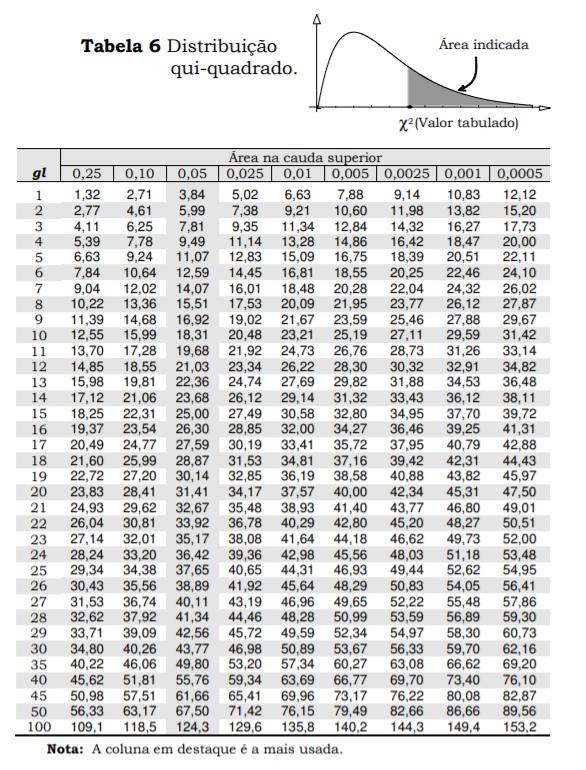

## Nível Descritivo

**Utilizamos a Estatística de Teste para saber qual o nível descritivo. Em outra palavras, é a chance de não existir associação entre as variáveis**.

Em geral, um nível descritivo < 10% (ou 0,1) sugere que há associação entre as variáveis.

In [ ]:
import scipy

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(tab_cont.loc[linhas,colunas])

In [ ]:
f'{p:f}' #p é o p-valor

'0.000027'

**Como p < 0.1 , assumimos que há associação entre as variáveis**

In [ ]:
stat #Estatística de Teste

28.644063416795767

In [ ]:
dof #É o degree of freedom (graus de liberdade) = (quantidade de linhas - 1) * (numero de colunas - 1)
# (quantidade de linhas - 1) = 5
# (numero de colunas - 1) = 1
# 5 * 1 = 5

5

In [ ]:
expected #é a tabela de valores esperados

array([[ 1.88780488,  1.11219512],
       [13.84390244,  8.15609756],
       [42.16097561, 24.83902439],
       [33.9804878 , 20.0195122 ],
       [20.13658537, 11.86341463],
       [16.9902439 , 10.0097561 ]])

# Aula 10 - Correlação e gráfico de dispersão

## Identificando as colunas numéricas e texto

In [ ]:
colInt_Analisar = []
for col in list(df.columns):
  if df[col].dtype != 'object' and col not in ['car_ID','price']:
    if len(list(df[col].unique())) > 10:
      #print(f'coluna:{col} e unicos:{list(df[col].unique())}')
      colInt_Analisar.append(col)
print('Qt de colunas:',len(colInt_Analisar),'Nome da coluna:',colInt_Analisar)

Qt de colunas: 13 Nome da coluna: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [ ]:
colString_analisar = [] #criando uma lista em branco
for coluna in list(df.columns): #para colunas do meu DF, farei o seguinte:
  if df[coluna].dtype == 'object': #se for do tipo texto
    print(f'{coluna}: possui {len(df[coluna].unique())} valores unicos') #dou um print para ver quantas valores distintos nós temos
    if len(df[coluna].unique()) <= 10: #Se for até 10 valores distintos
      colString_analisar.append(coluna) #Entao eu ja sei que dá para analisar com mais facilidade

CarName: possui 147 valores unicos
fueltype: possui 2 valores unicos
aspiration: possui 2 valores unicos
doornumber: possui 2 valores unicos
carbody: possui 5 valores unicos
drivewheel: possui 3 valores unicos
enginelocation: possui 2 valores unicos
enginetype: possui 7 valores unicos
cylindernumber: possui 7 valores unicos
fuelsystem: possui 8 valores unicos
price_2Fxs: possui 2 valores unicos
price_3Fxs: possui 4 valores unicos


## Elaborando o gráfico de dispersão



```
px.scatter(df,x=VARIAVEL_EXPLICATIVA, y=VARIAVEL_RESPOSTA ,title = 'TITULO',trendline="ols", color=COLUNA,template)
```
* df: é o Data Frame
* x: é a variável explicativa
* y: é a variável resposta
* title: é o título do gráfico
* trendline: é a linha de tendência. "ols" significa *ordinary least square*, ou seja, mínimos quadrados. **Veremos esse conteúdo na aula de regressão linear
* color: é uma coluna cuja variável costuma ser do tipo qualitativa (ordinal ou nominal). Servirá para observarmos os pontos do gráfico em diferentes cores a fim de identificar grupos e avaliar seus comportamentos isoladamente
* templace: estilo do gráfico. Exemplo: template="simple_white"



[Documentação](https://plotly.com/python/line-and-scatter/)

In [ ]:
fig = px.scatter(df,x='curbweight', y='price',title = 'Gráfico de Dispersao de price e curbweight',template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df,x='curbweight', y='price',title = 'Gráfico de Dispersao de price e curbweight com linha de tendência',trendline="ols",template="simple_white")
fig.show()
#Podemos observar que a tendência é que quando maior o preço, maior o valor de curbweight

## Correlação

* [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
* [Plotly Heatmap - Documentação](https://plotly.com/python/heatmaps/)
* [Plotly Heatmap - Inspiração pelo Stackoverflow](https://stackoverflow.com/questions/66572672/correlation-heatmap-in-plotly)

### Pandas

In [ ]:
df[['price','curbweight']].corr(method='pearson', min_periods=1)

,price,curbweight
price,1.000000,0.835305
curbweight,0.835305,1.000000


In [ ]:
df[['price']+colInt_Analisar].corr(method='pearson', min_periods=1)

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599
wheelbase,0.577816,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.682920,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.759325,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.119336,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,0.835305,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,0.874145,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,0.553173,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,0.079443,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,0.067984,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


### Plotly

In [ ]:
corr = df[['price','curbweight','stroke','citympg']].corr(method='pearson', min_periods=1)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = px.imshow(corr, #Fonte de dados é a tabela de correlação
                text_auto=True, #Inseri o nome dos dados
                color_continuous_scale=px.colors.diverging.RdBu, #As cores serão de azul (1) a vermelho (-1)
                zmin=-1,zmax=1 #defino que o minimo é -1 e o maximo é 1
                )


fig.update_layout(
    title_text='Correlações entre variáveis numéricas', #titulo
    title_x=0.5,  #Titulo centralizado
    width=500, #largura
    height=500, #altura
    xaxis_showgrid=False, #Para omitir as linhas de grade no eixo x
    yaxis_showgrid=False, #Para omitir as linhas de grade no eixo y
    template='plotly_white' #template
)


fig.show()